# Read Dataset

In [112]:
socar_df = pd.read_csv('insurance_fraud_detect_data.csv')

socar = socar_df.copy()
socar.tail()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0
15999,0,2,0,2,0,1,0,100,1,0,...,1188750,2,0,0,1,0,0,0,-1,0


In [113]:
# test set is for evaluating our models.
socar_tr = socar[socar.test_set == 0].drop(['test_set'], axis=1)
socar_test = socar[socar.test_set == 1].drop(['test_set'], axis=1)

In [114]:
cat_attribs = [attrib for attrib in socar.columns if attrib not in ['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'test_set']]
                
socar_1hot = pd.get_dummies(socar, columns=cat_attribs)

socar_1hot_tr = socar_1hot[socar_1hot.test_set == 0].drop(['test_set'], axis=1)
socar_1hot_test = socar_1hot[socar_1hot.test_set == 1].drop(['test_set'], axis=1)

In [3]:
socar.describe()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,...,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.002563,1.695125,0.140563,2.484625,0.085312,2.554875,0.013125,89.061562,1.757125,0.162875,...,8.594367e+05,1.288625,0.329313,0.173250,1.358375,0.299312,0.359500,0.292000,-0.461875,0.195062
std,0.050558,0.760156,0.347581,1.165428,0.279355,1.162841,0.161491,29.688451,0.757247,0.369263,...,3.094520e+06,1.327377,0.469978,0.378475,0.908085,0.487842,0.604076,0.454697,0.995670,0.396261
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,100.000000,1.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,100.000000,2.000000,0.000000,...,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
75%,0.000000,2.000000,0.000000,3.000000,0.000000,4.000000,0.000000,100.000000,2.000000,0.000000,...,5.651200e+05,2.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,5.000000,1.000000,5.000000,1.000000,4.000000,2.000000,100.000000,3.000000,1.000000,...,9.471435e+07,5.000000,1.000000,1.000000,37.000000,3.000000,2.000000,1.000000,5.000000,1.000000


# EDA

In [4]:
socar_test[socar_test.fraud_YN == 1]

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt
100,1,2,0,2,0,1,0,100,1,0,...,0.0000,0,2,0,1,1,0,0,0,-1
182,1,2,0,3,1,4,0,100,1,0,...,0.0000,0,0,0,0,1,0,0,0,-1
199,1,1,0,3,1,4,0,0,1,0,...,0.0000,0,1,1,0,1,1,1,1,0
247,1,2,0,2,0,1,0,100,1,1,...,337301.0013,520500,0,1,0,1,1,1,1,1
282,1,2,1,2,0,3,0,100,1,1,...,0.0000,670000,0,1,0,1,3,2,1,2
401,1,1,0,4,0,1,0,100,1,0,...,0.0000,0,4,0,0,1,0,0,0,-1
496,1,1,0,2,0,2,0,100,1,0,...,0.0000,0,4,0,0,1,0,0,0,-1


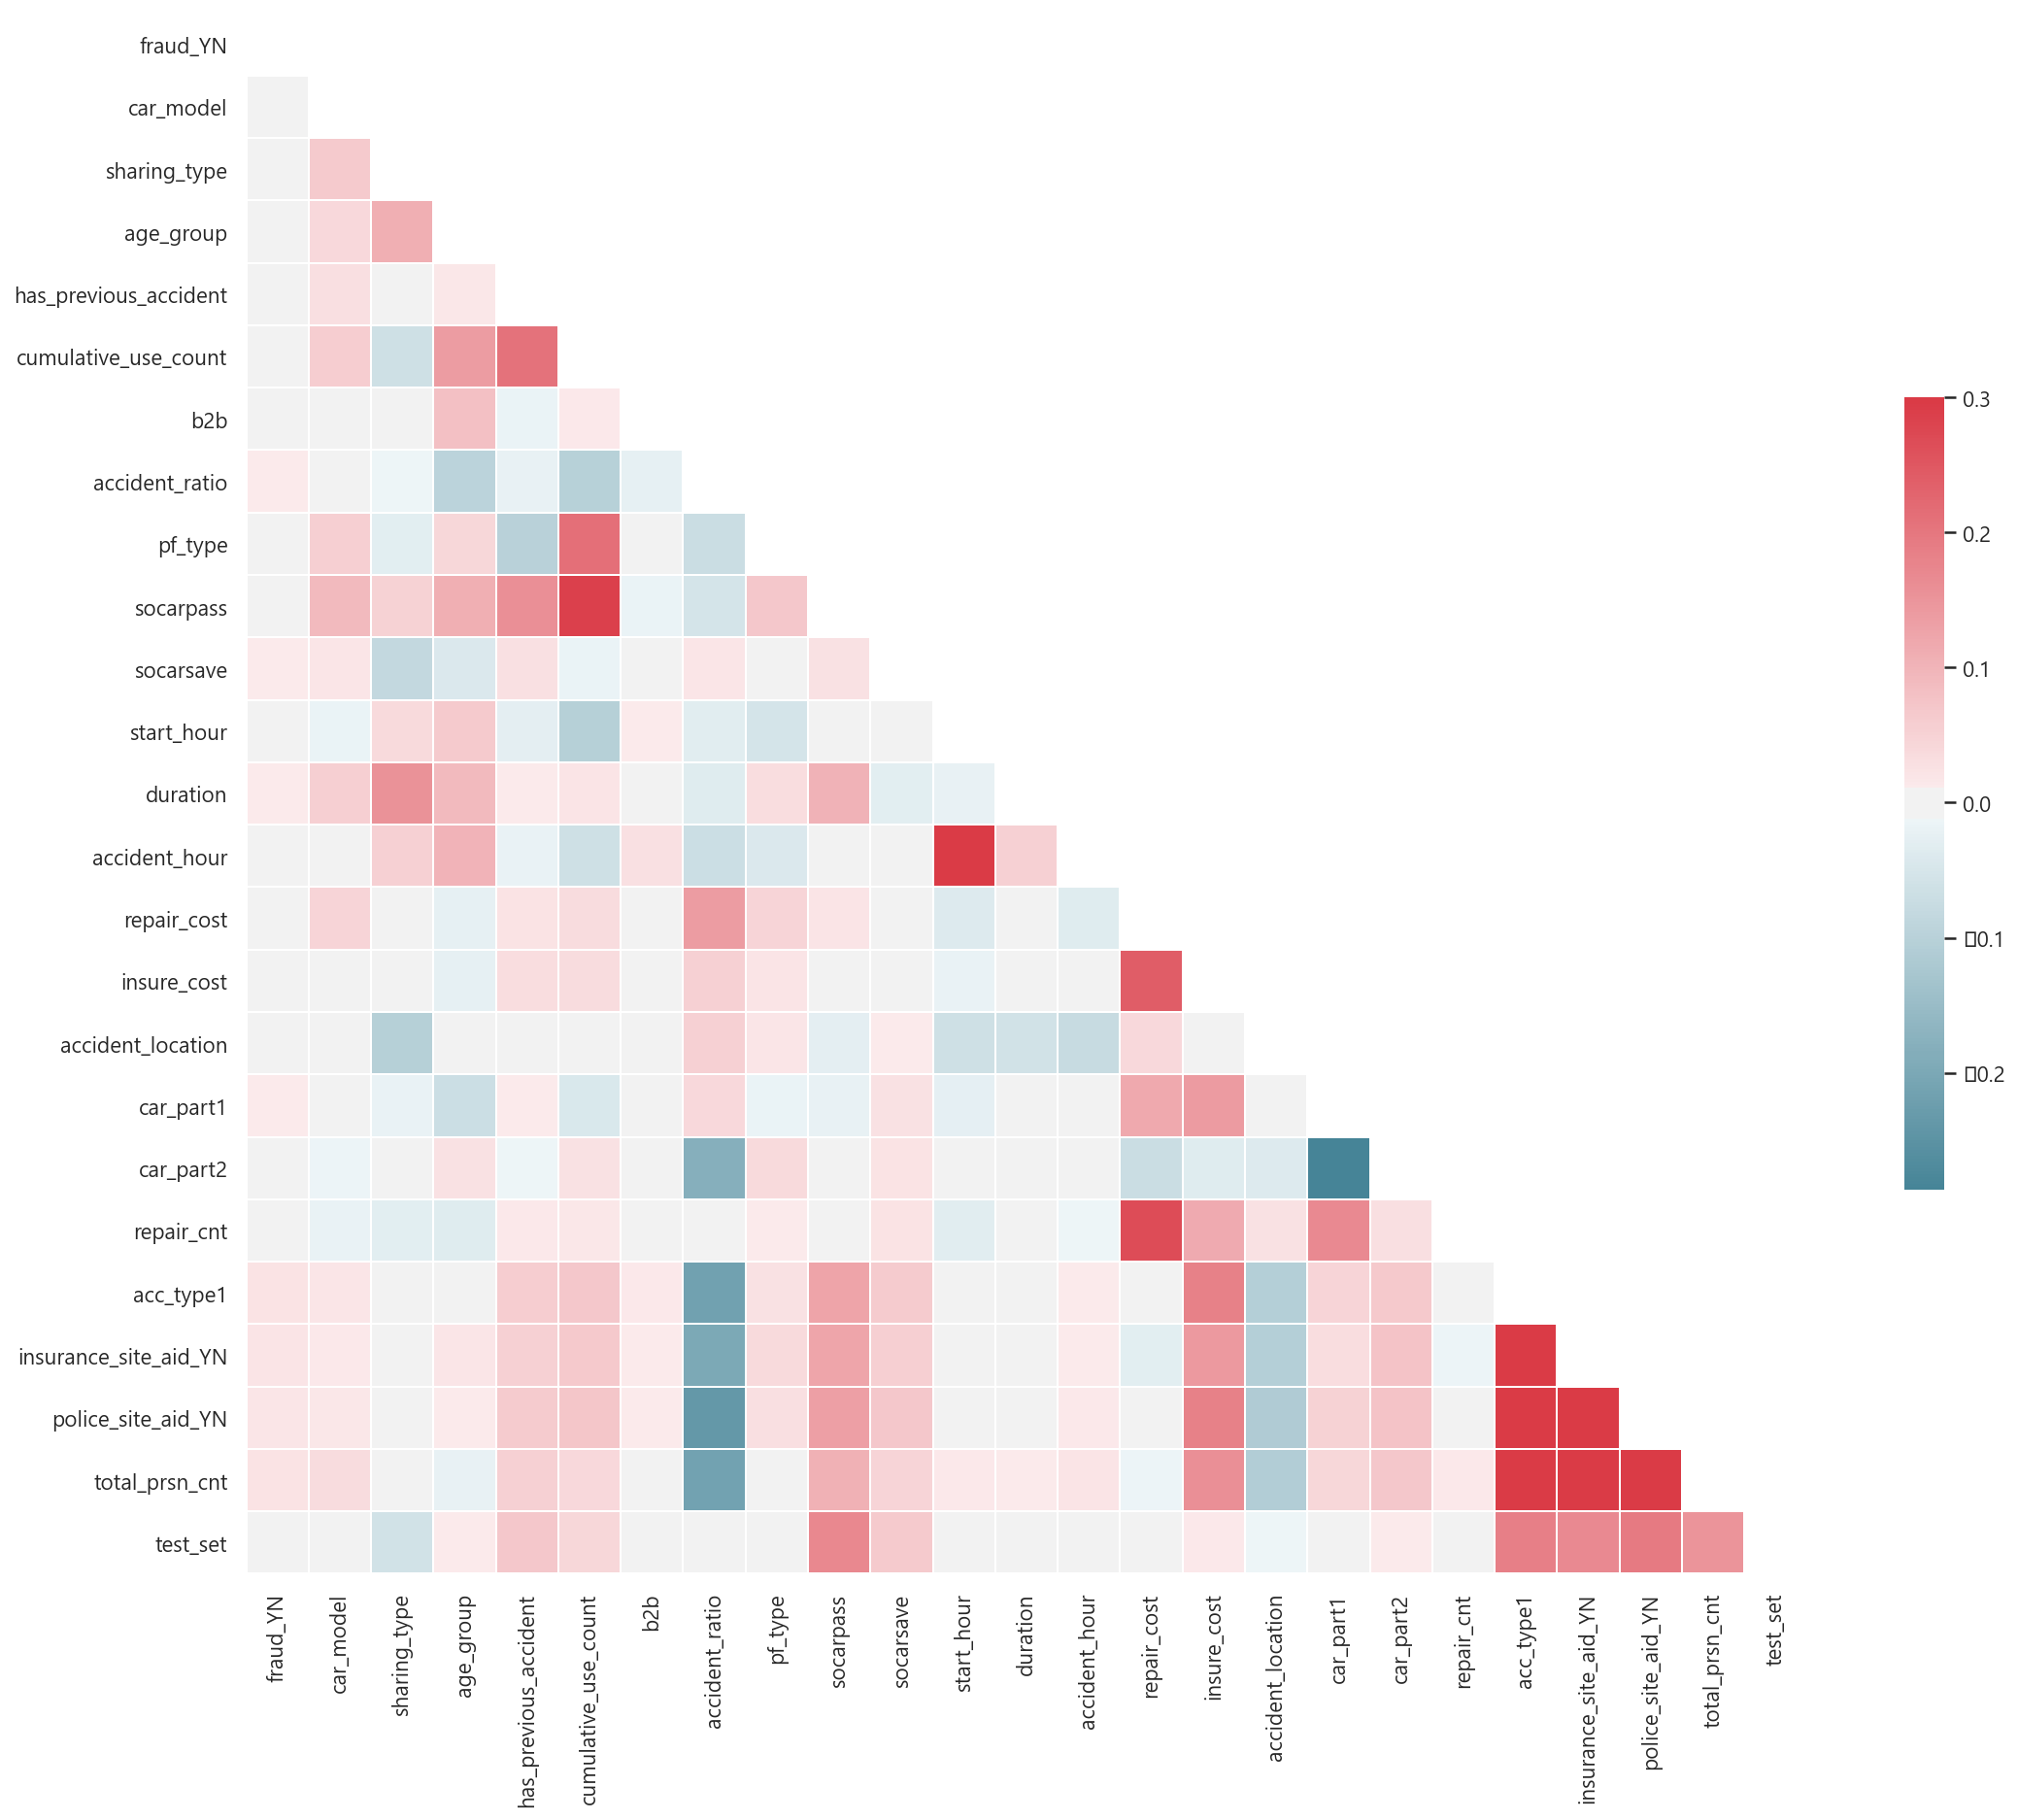

In [5]:
mask = np.zeros_like(socar.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(socar.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

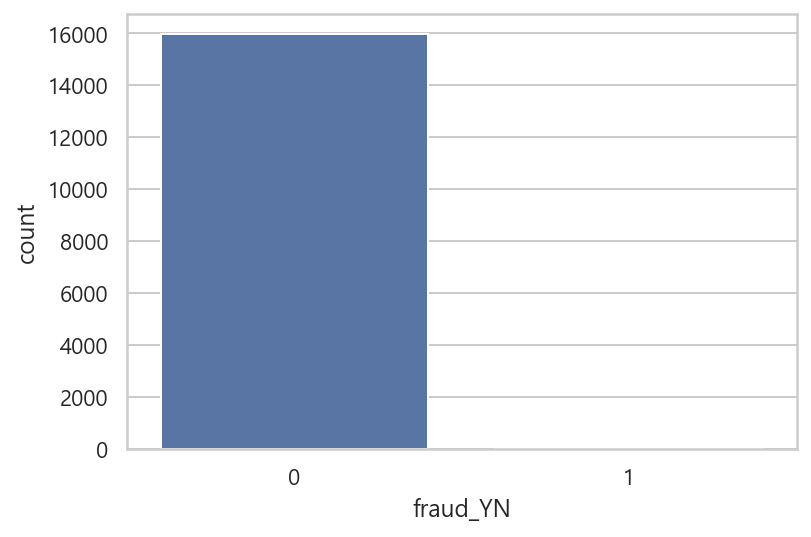

In [6]:
# Imbalanced Dataset
sns.countplot(data=socar, x='fraud_YN');

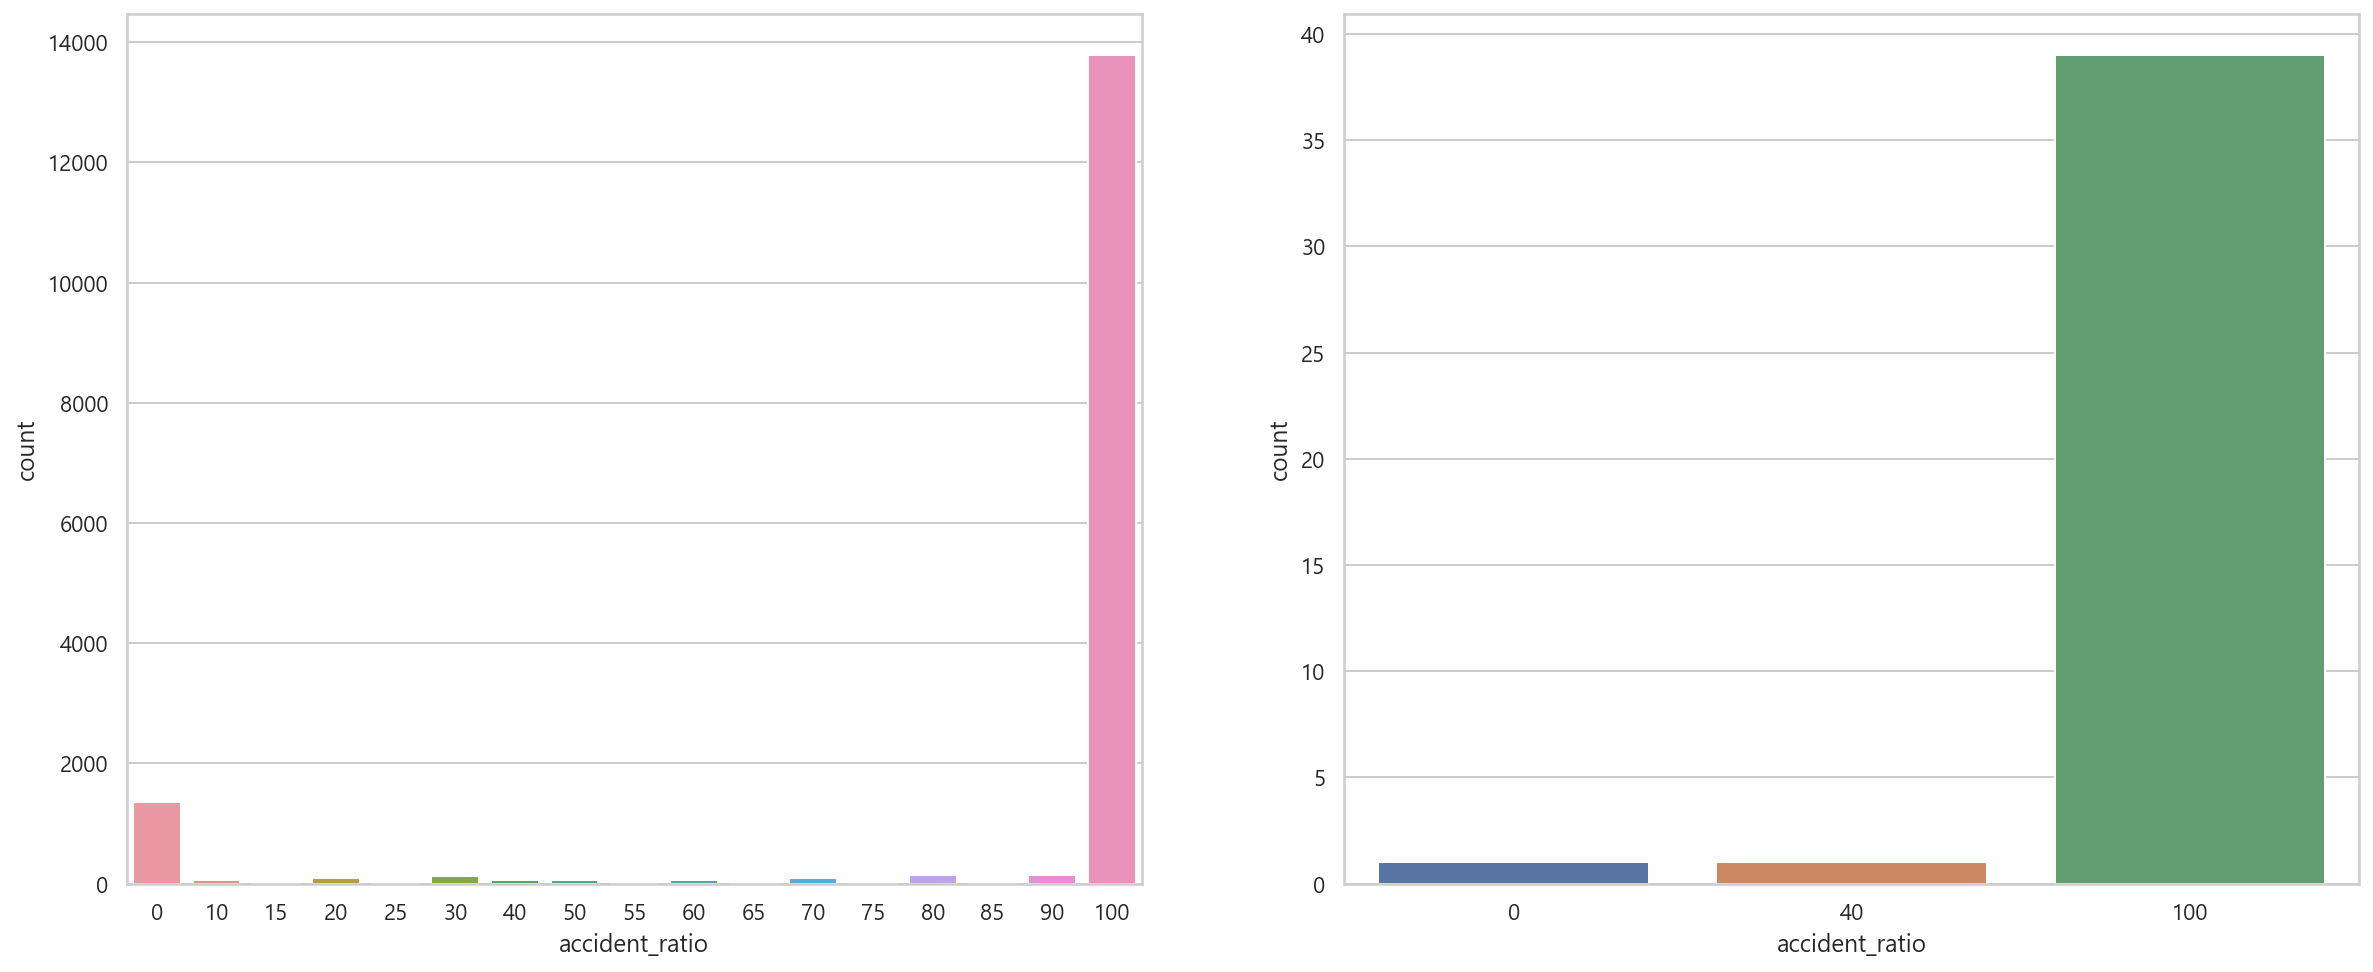

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='accident_ratio', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='accident_ratio', ax=ax[1]);

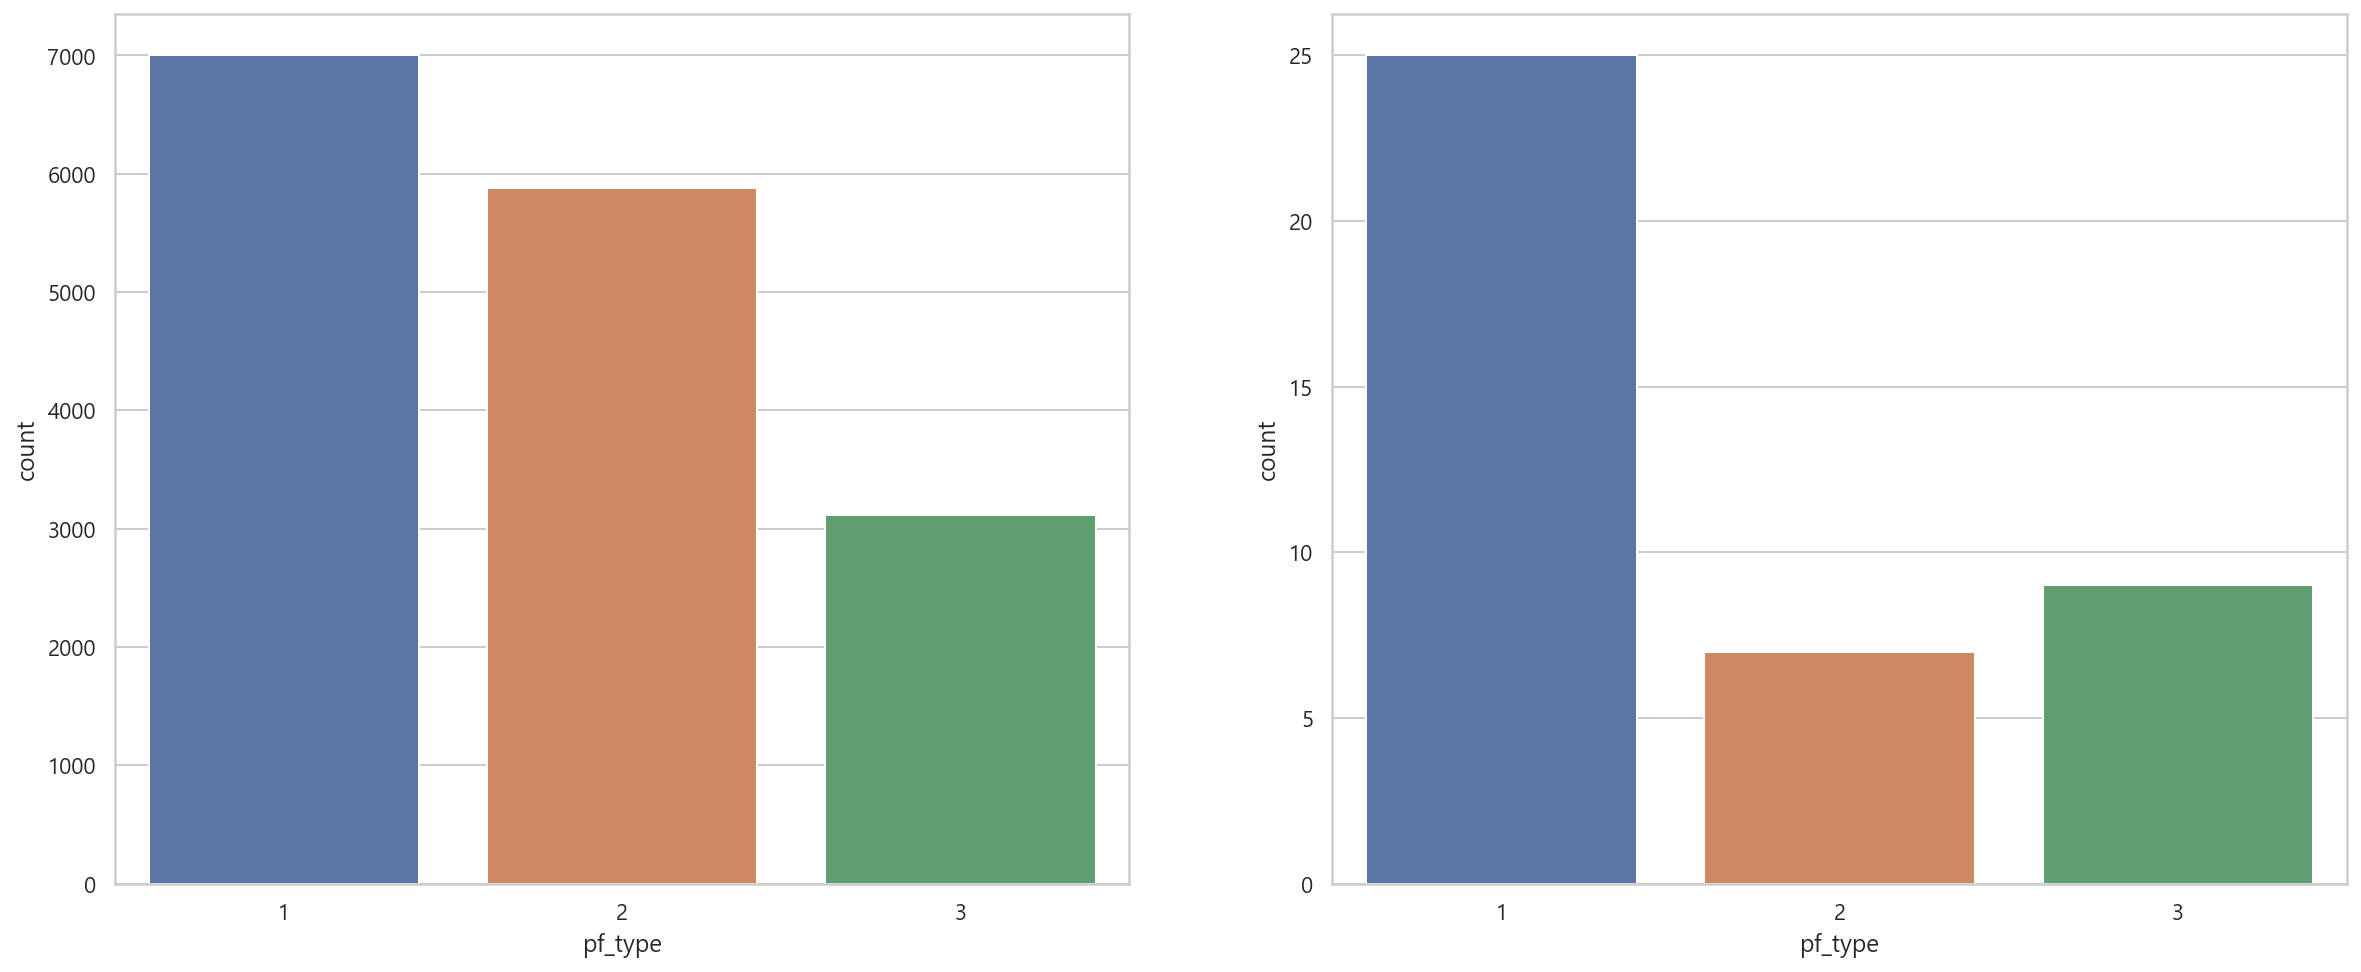

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='pf_type', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='pf_type', ax=ax[1]);

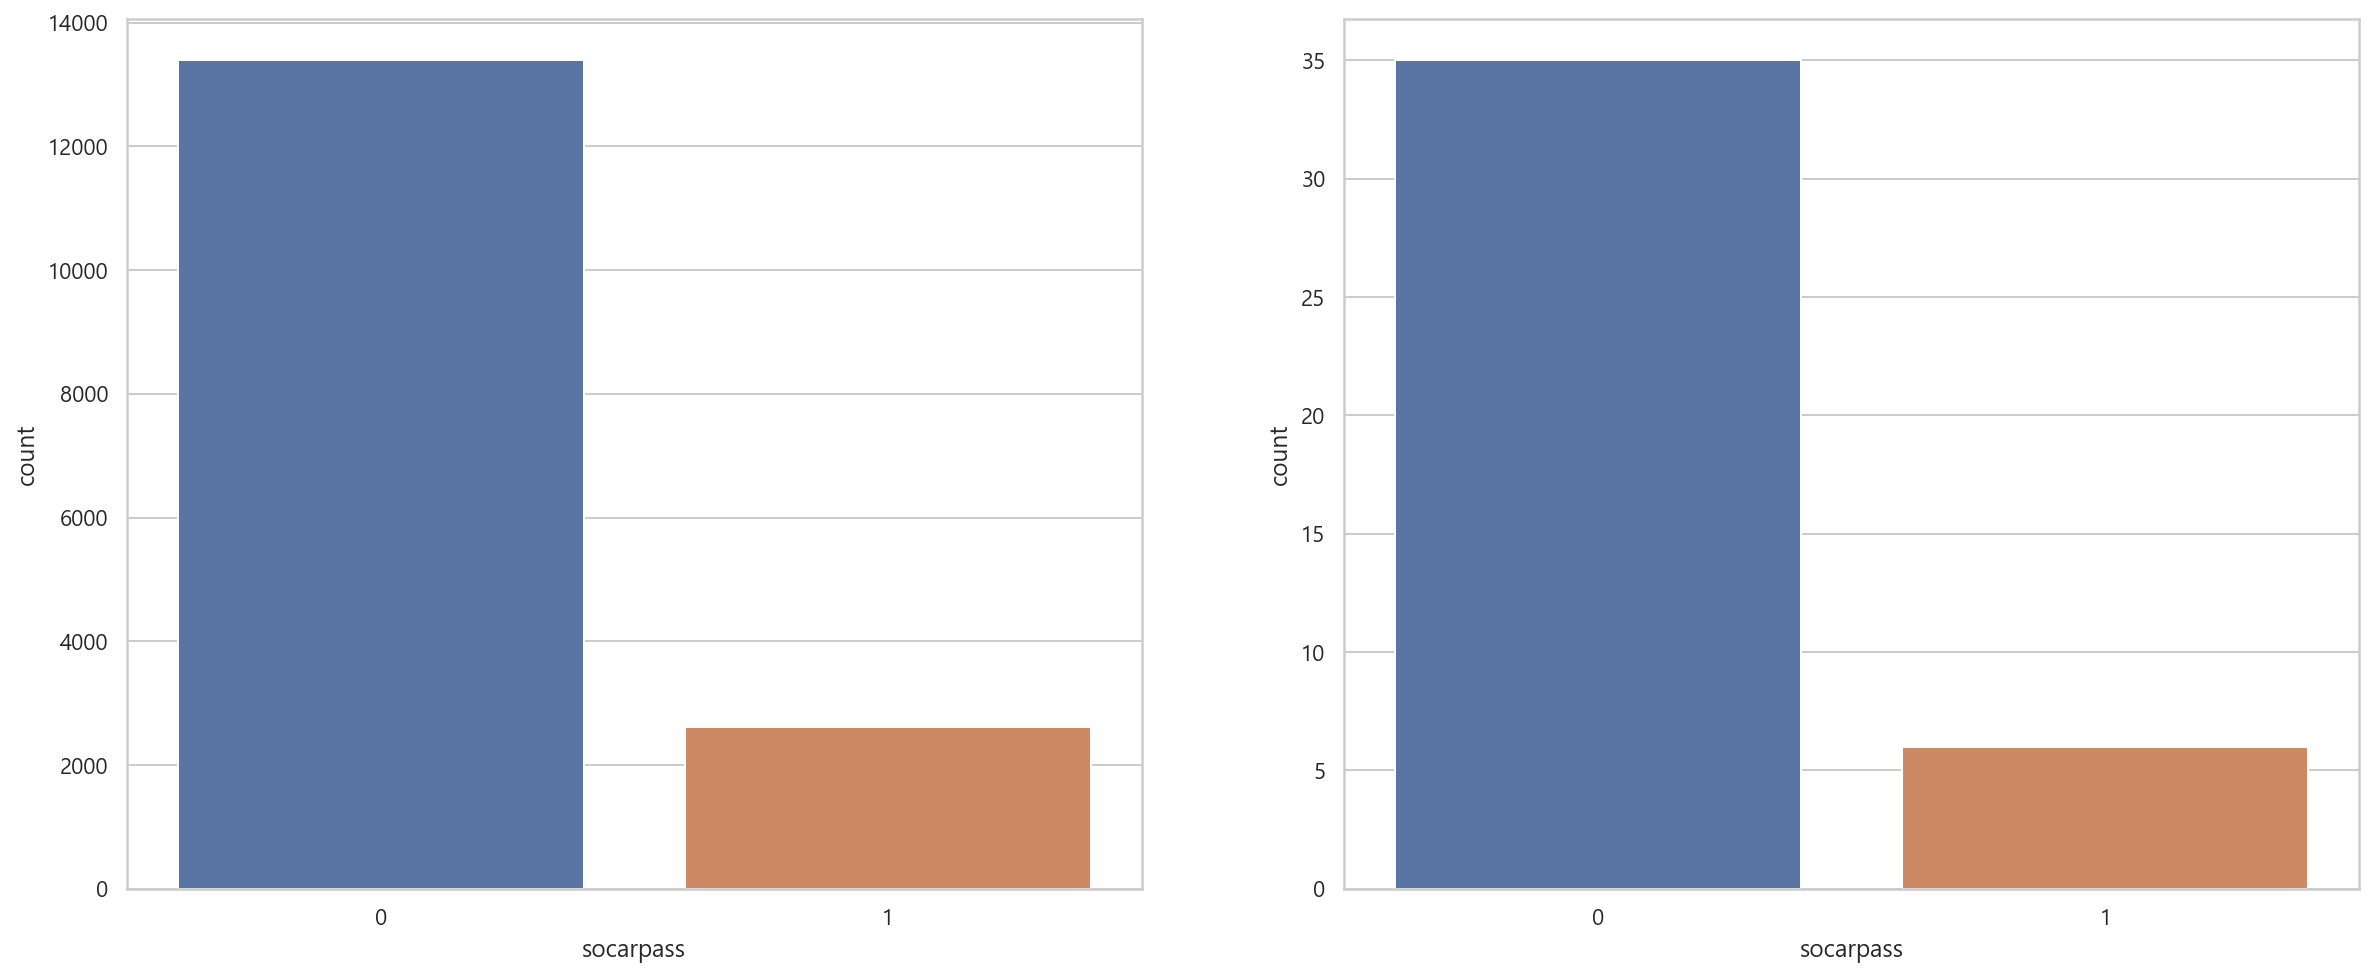

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='socarpass', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='socarpass', ax=ax[1]);

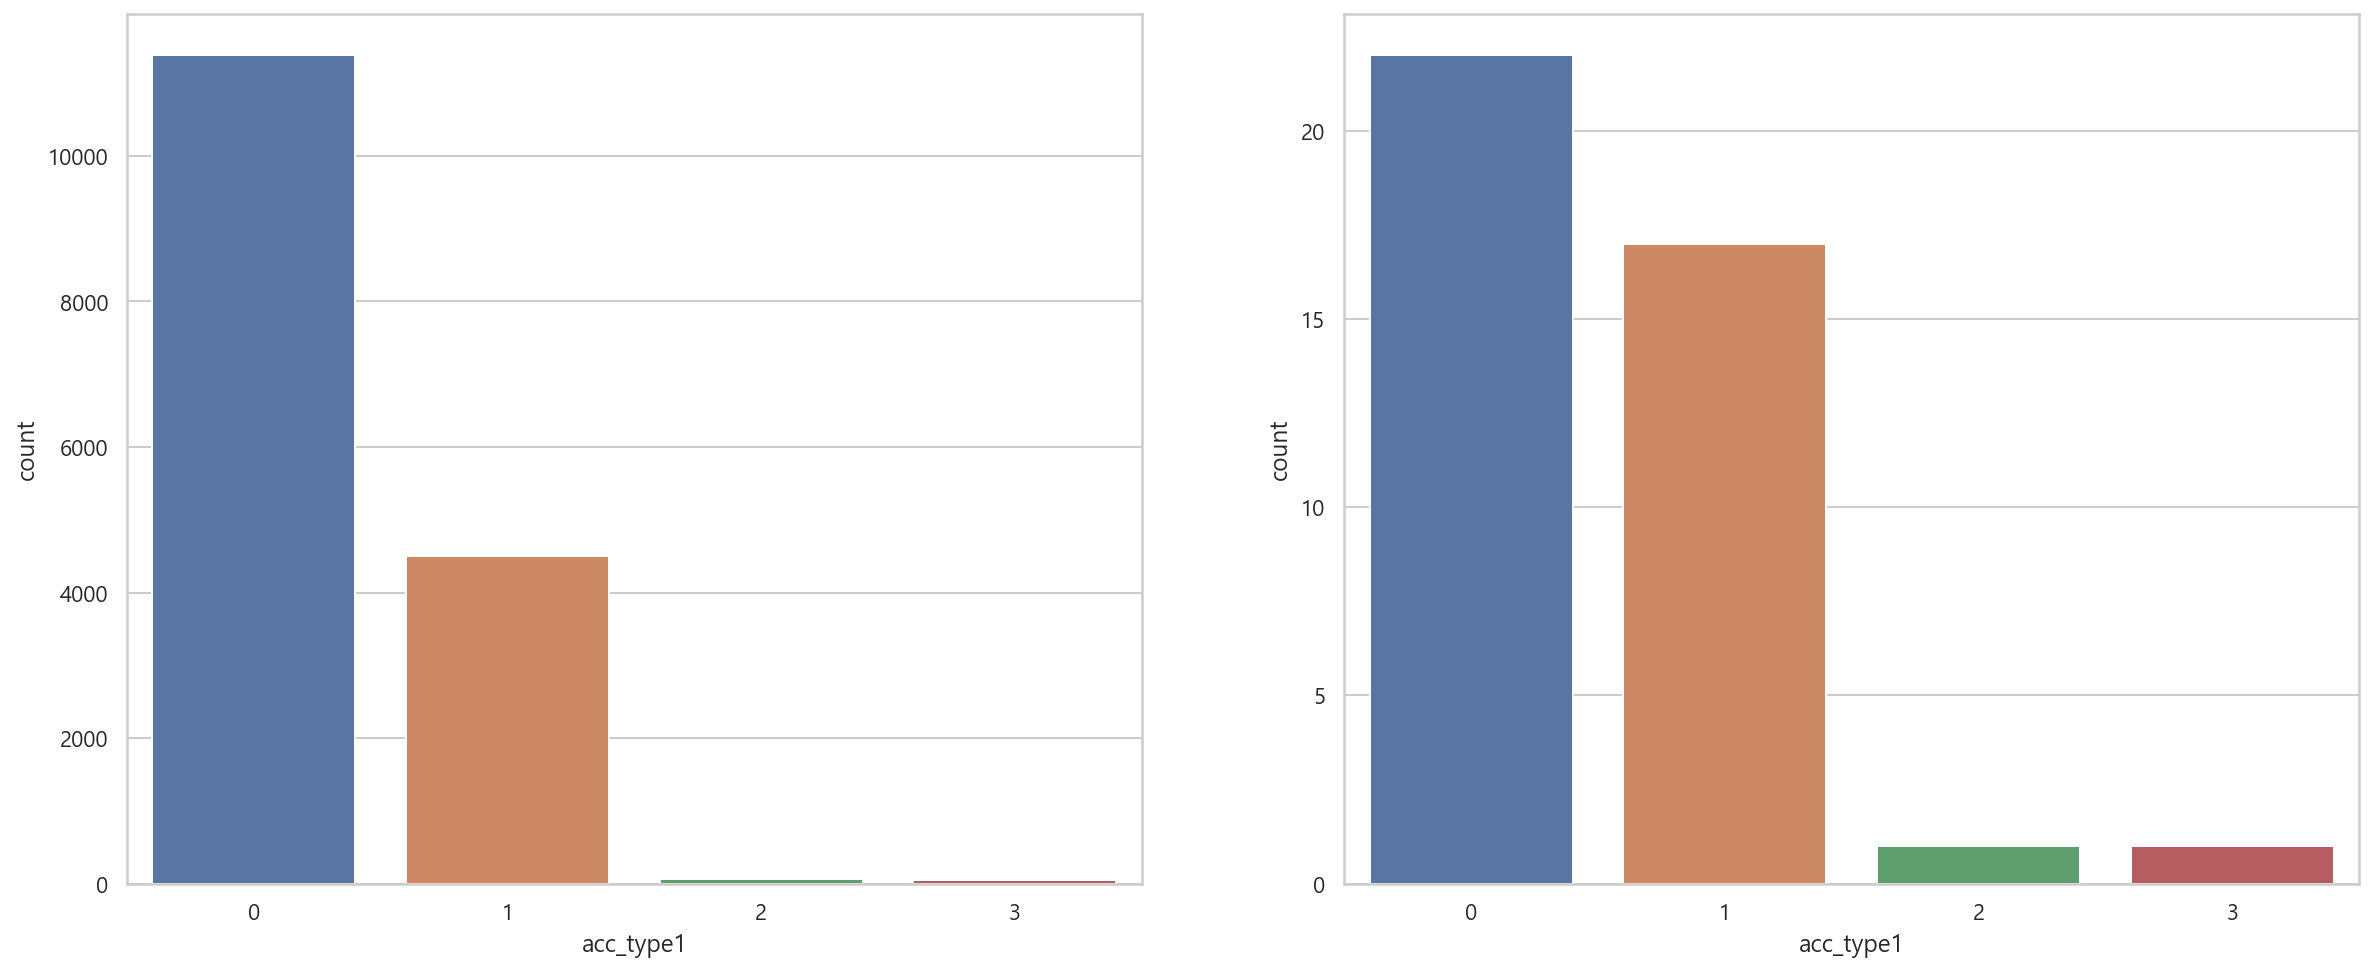

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='acc_type1', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='acc_type1', ax=ax[1]);

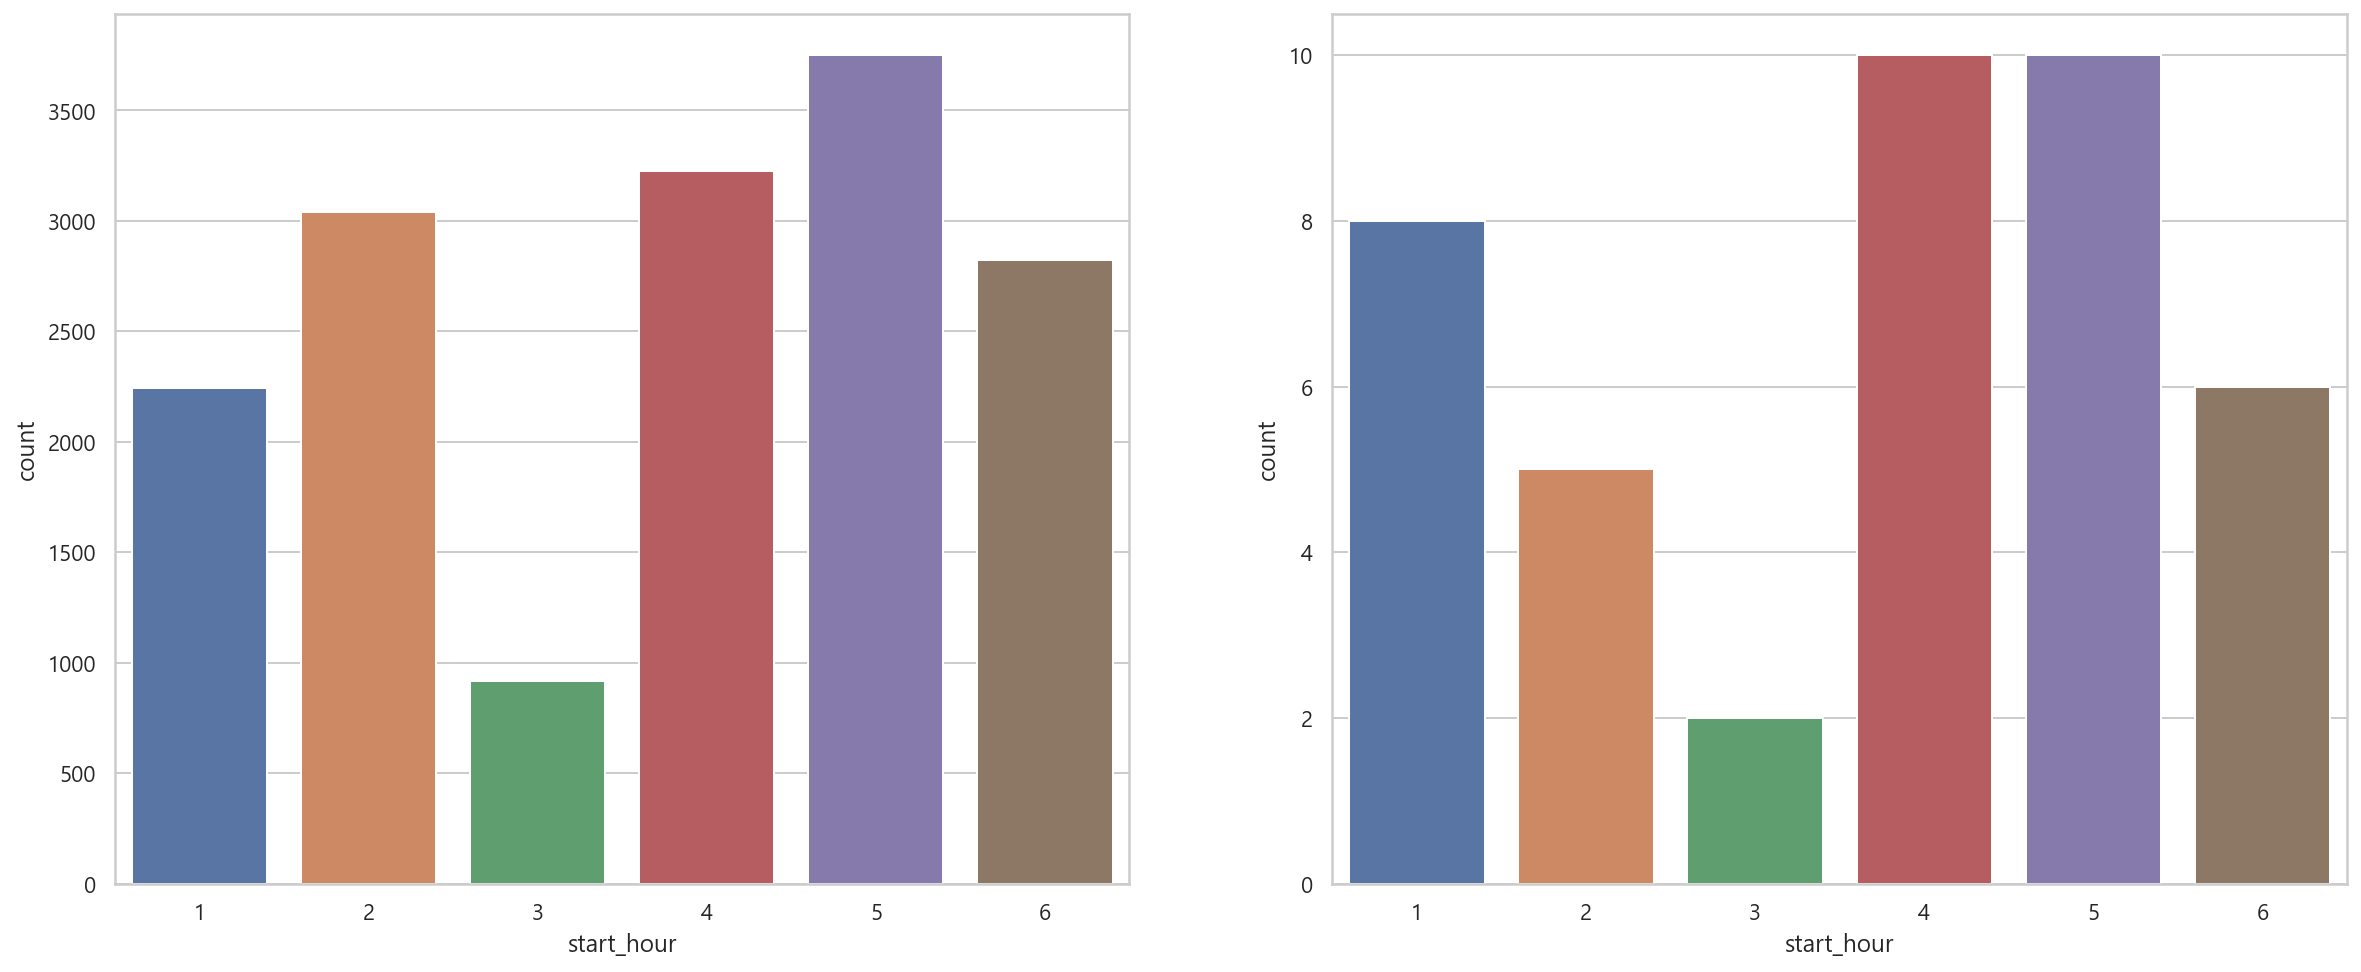

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='start_hour', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='start_hour', ax=ax[1]);

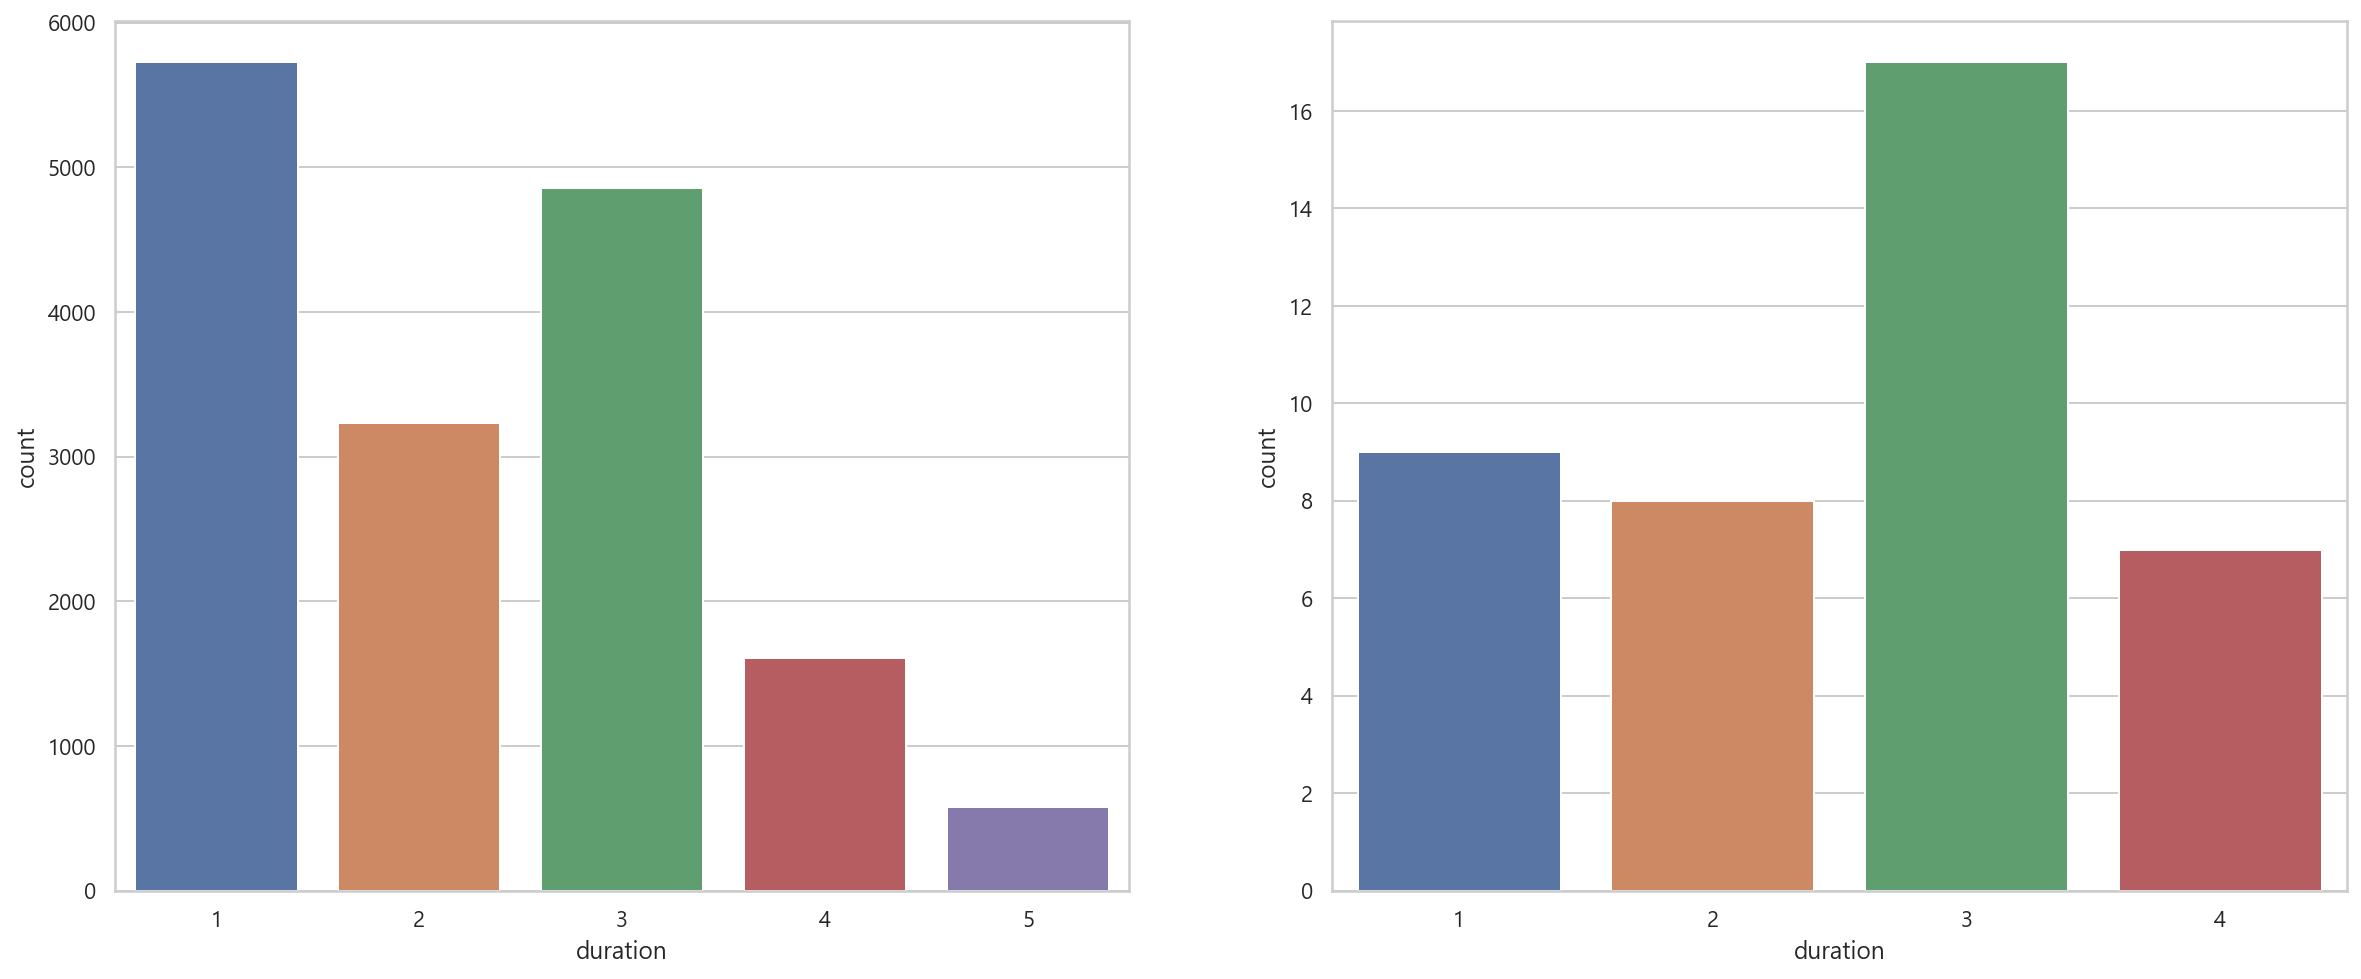

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='duration', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='duration', ax=ax[1]);

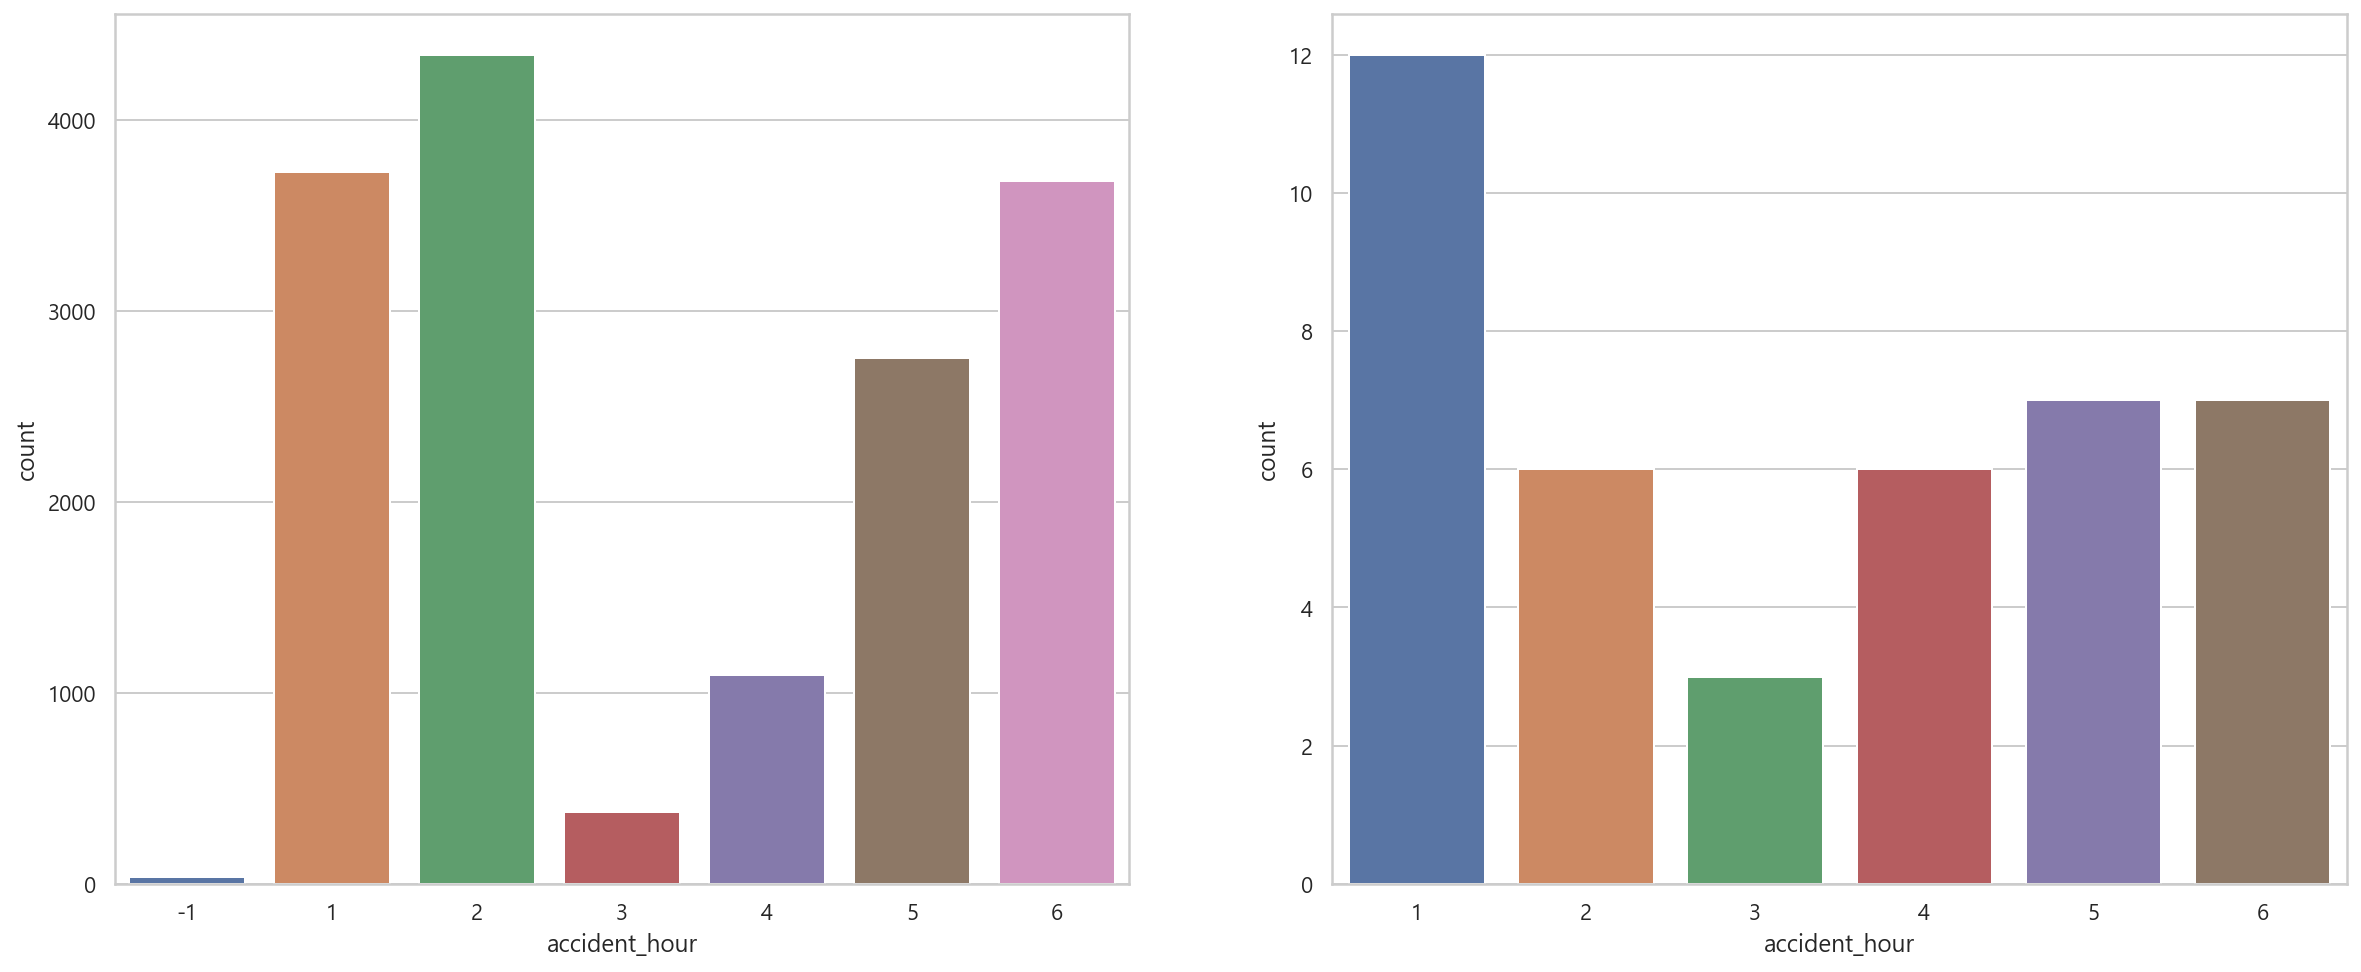

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='accident_hour', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='accident_hour', ax=ax[1]);

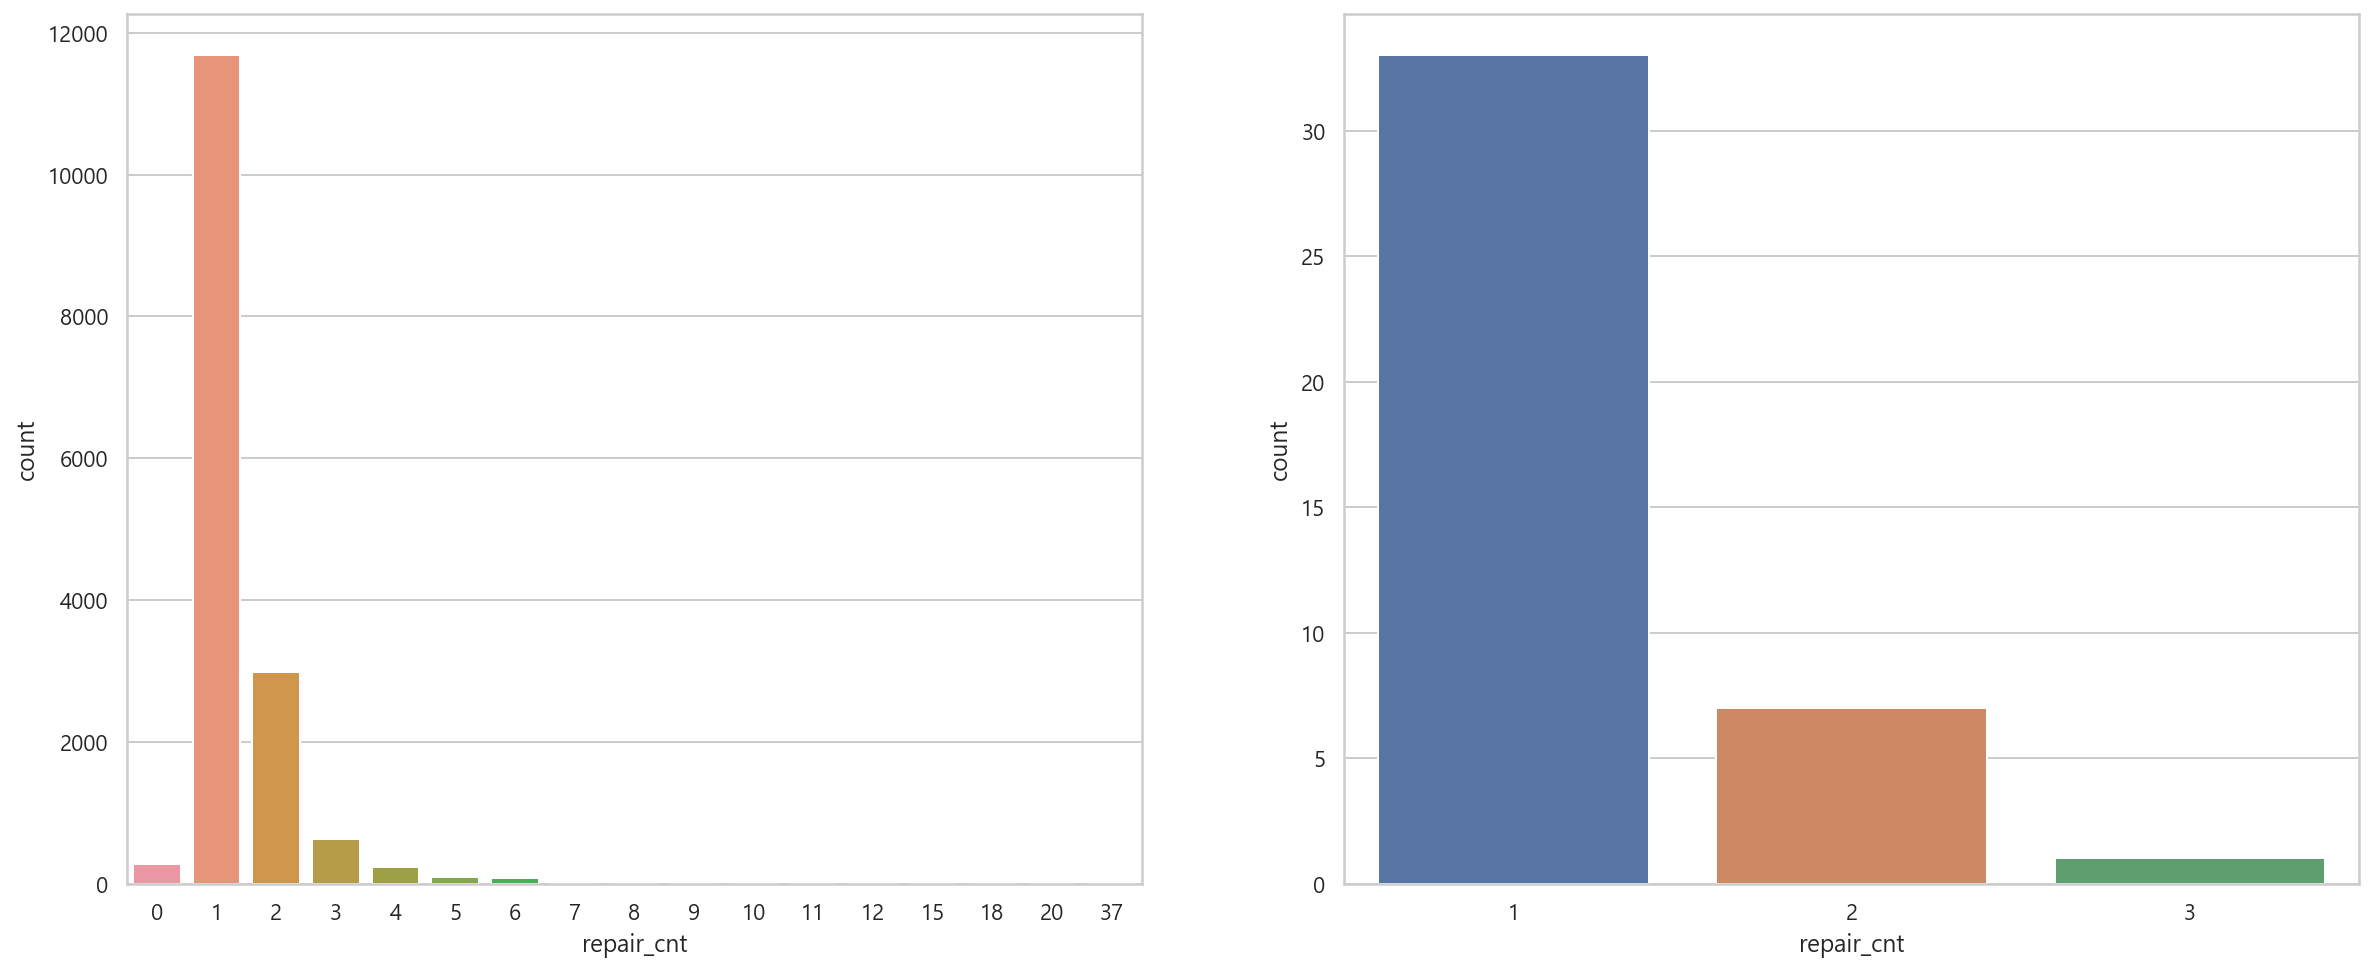

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='repair_cnt', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='repair_cnt', ax=ax[1]);

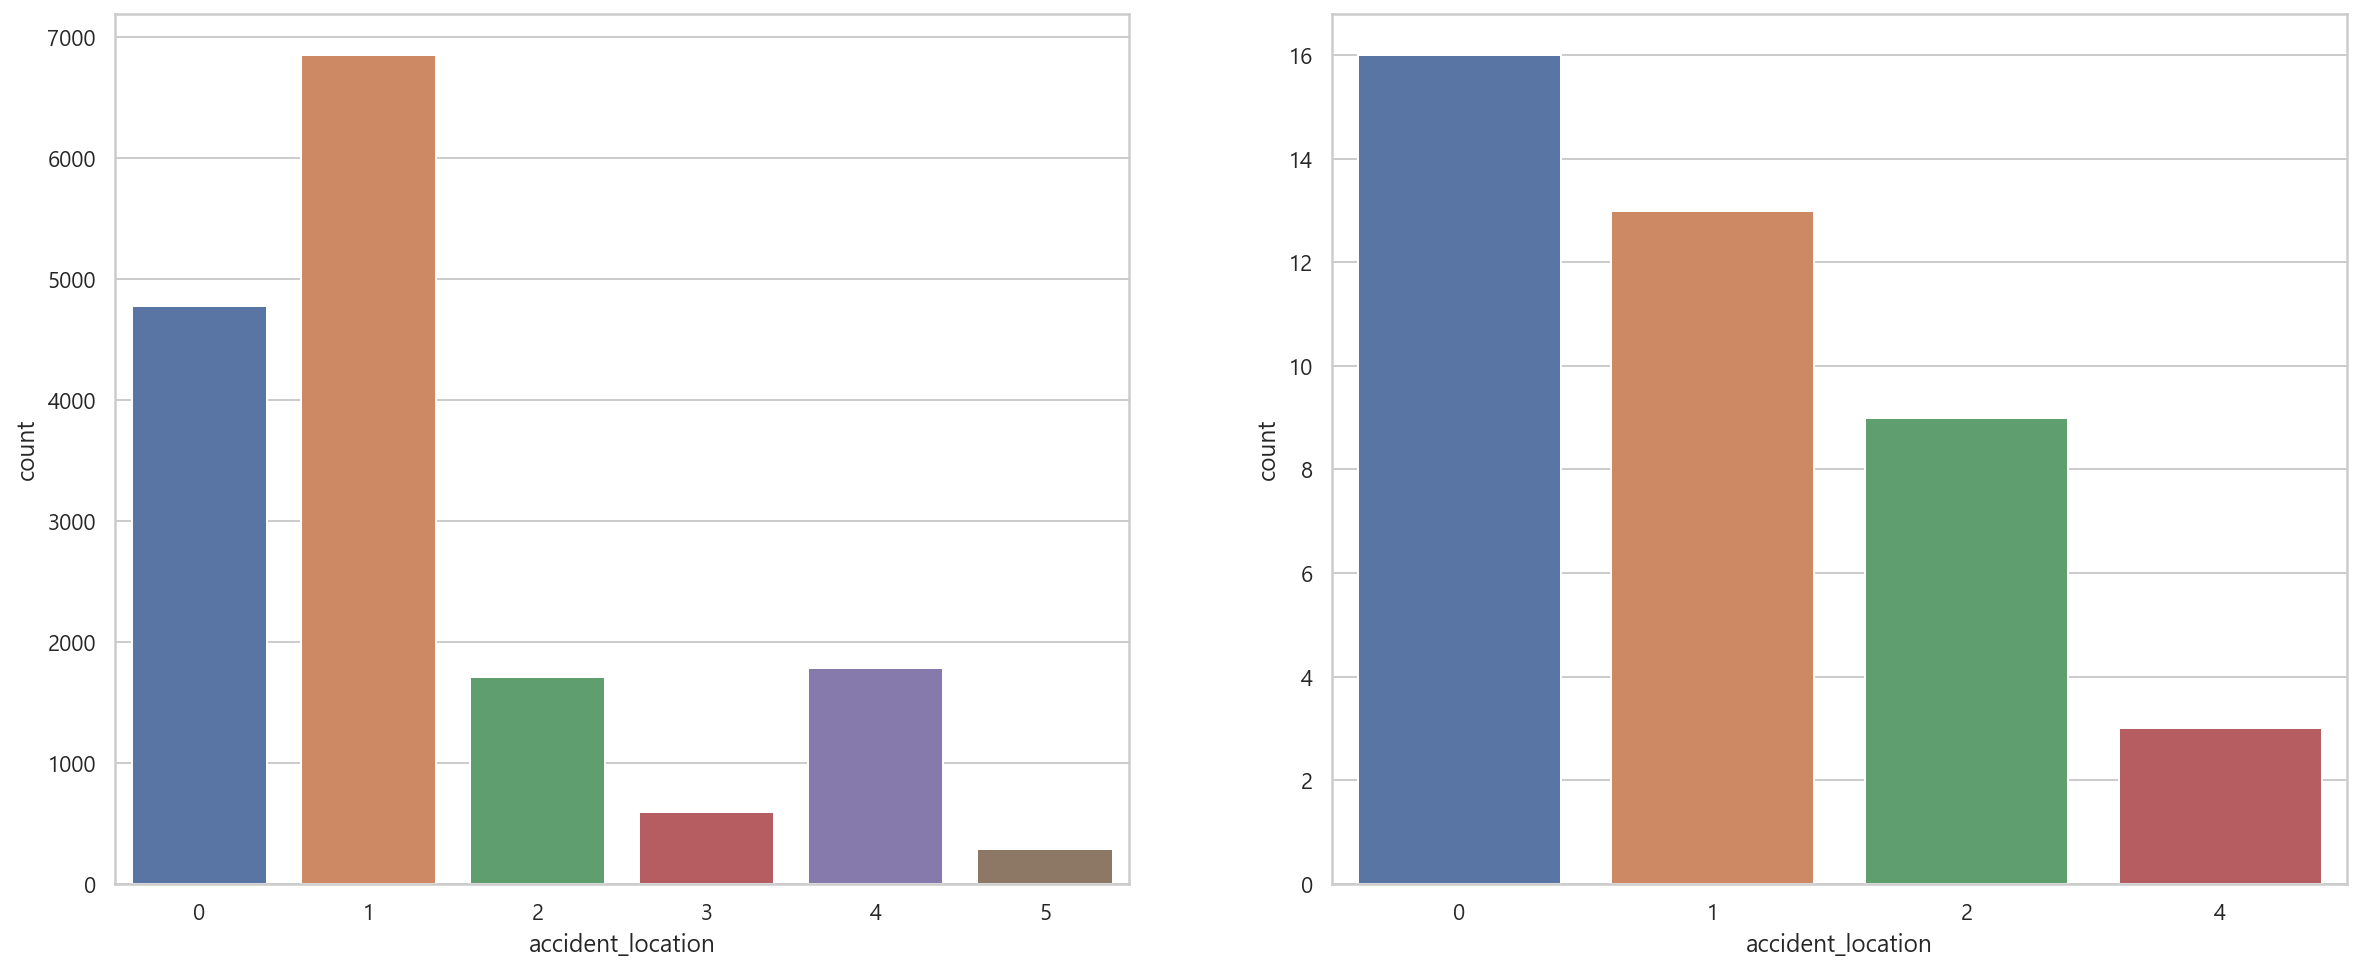

In [15]:
# 전체 데이터보다 이면도로나 쏘카존 사고 비율이 높음
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar, x='accident_location', ax=ax[0]);
sns.countplot(data=socar[socar.fraud_YN == 1], x='accident_location', ax=ax[1]);

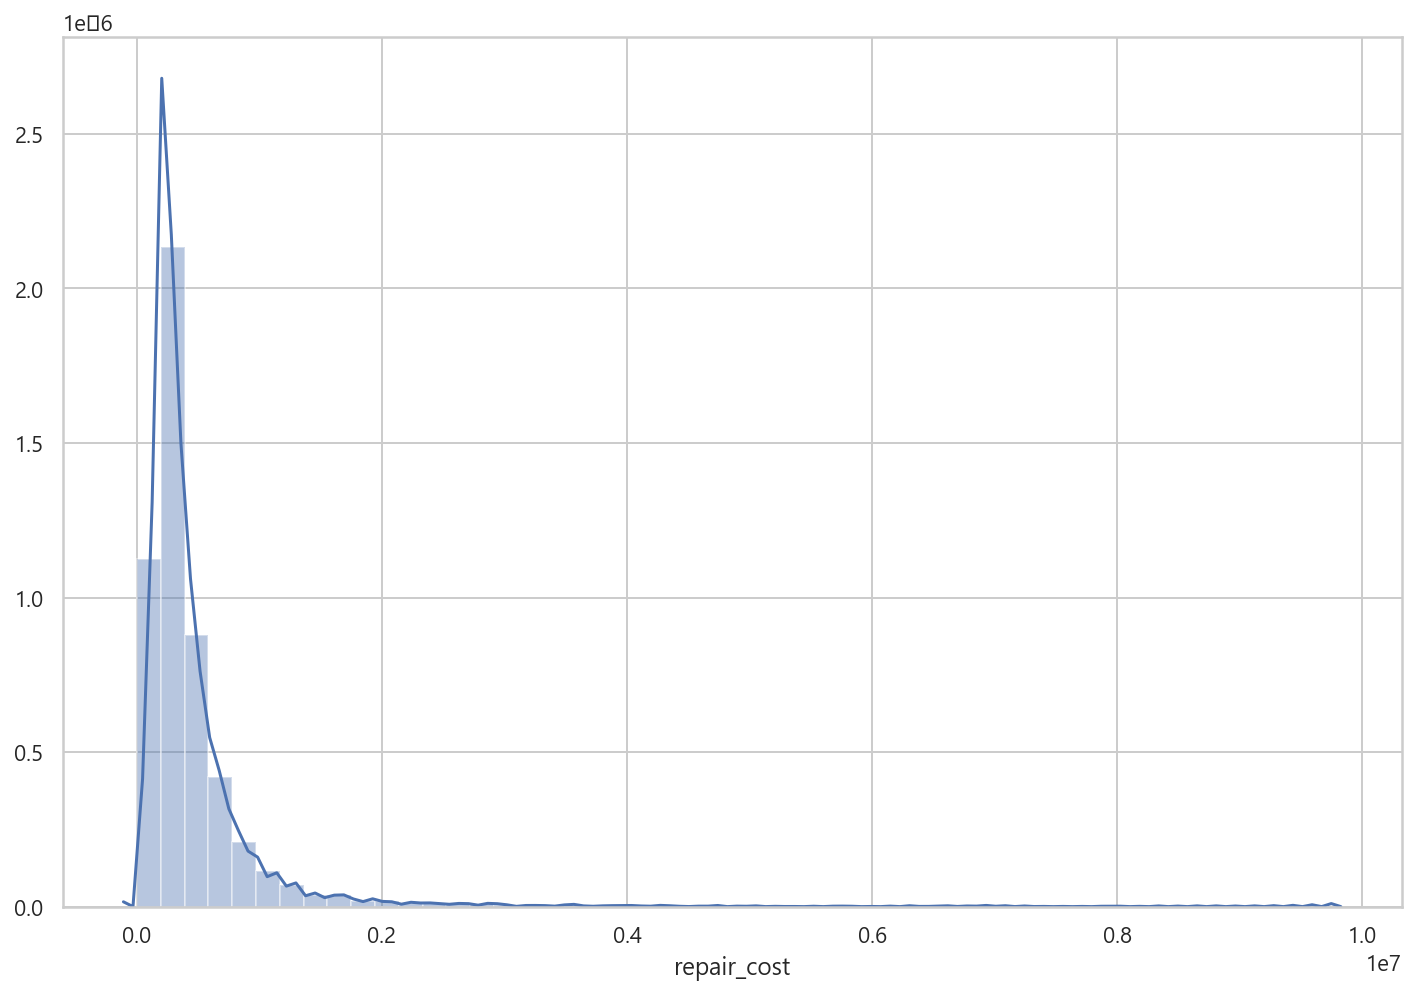

In [16]:
# Insure cost 0 is null
# Need to scale null and outlier datas.
plt.figure(figsize=(12,8))
sns.distplot(socar[socar.repair_cost > 0]["repair_cost"])
plt.show()

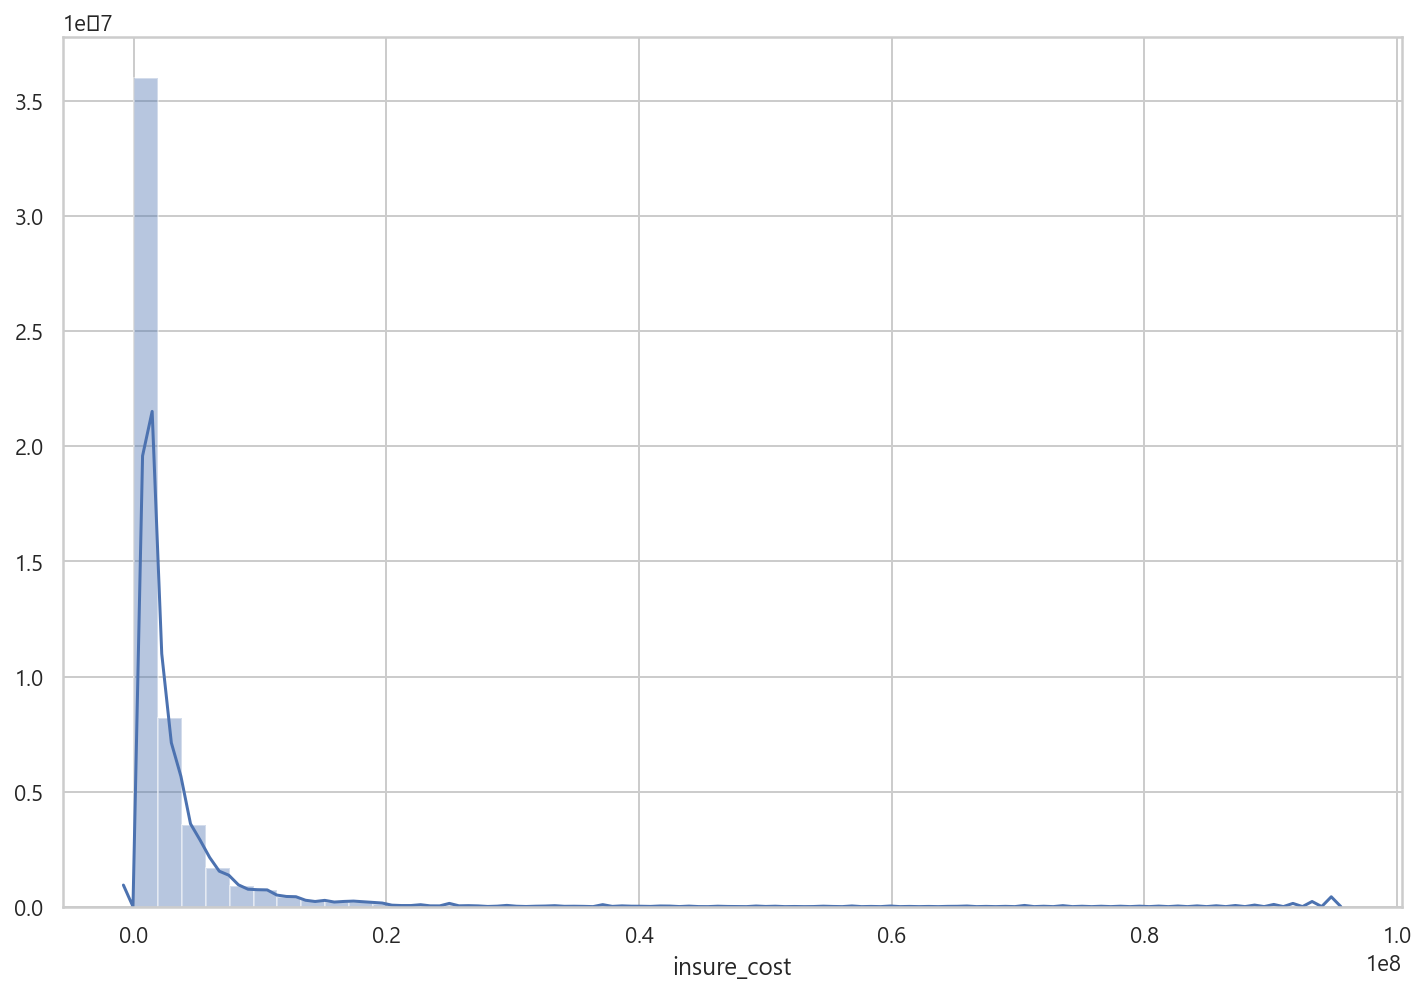

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(socar[socar.insure_cost > 0]["insure_cost"])
plt.show()

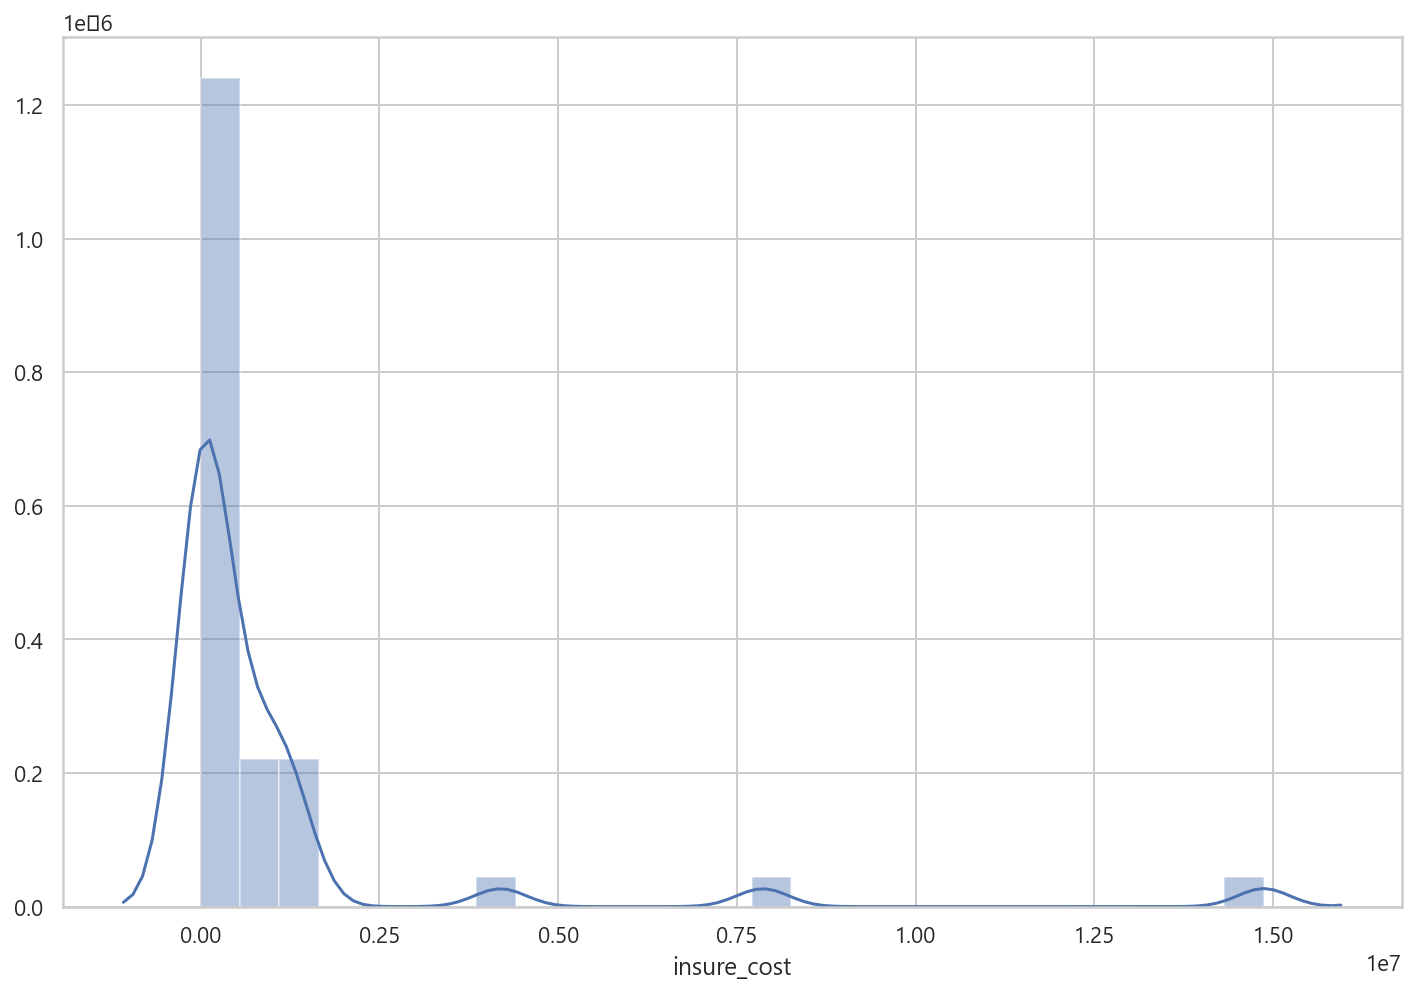

In [18]:
plt.figure(figsize=(12,8))
sns.distplot(socar[socar.fraud_YN == 1]["insure_cost"])
plt.show()

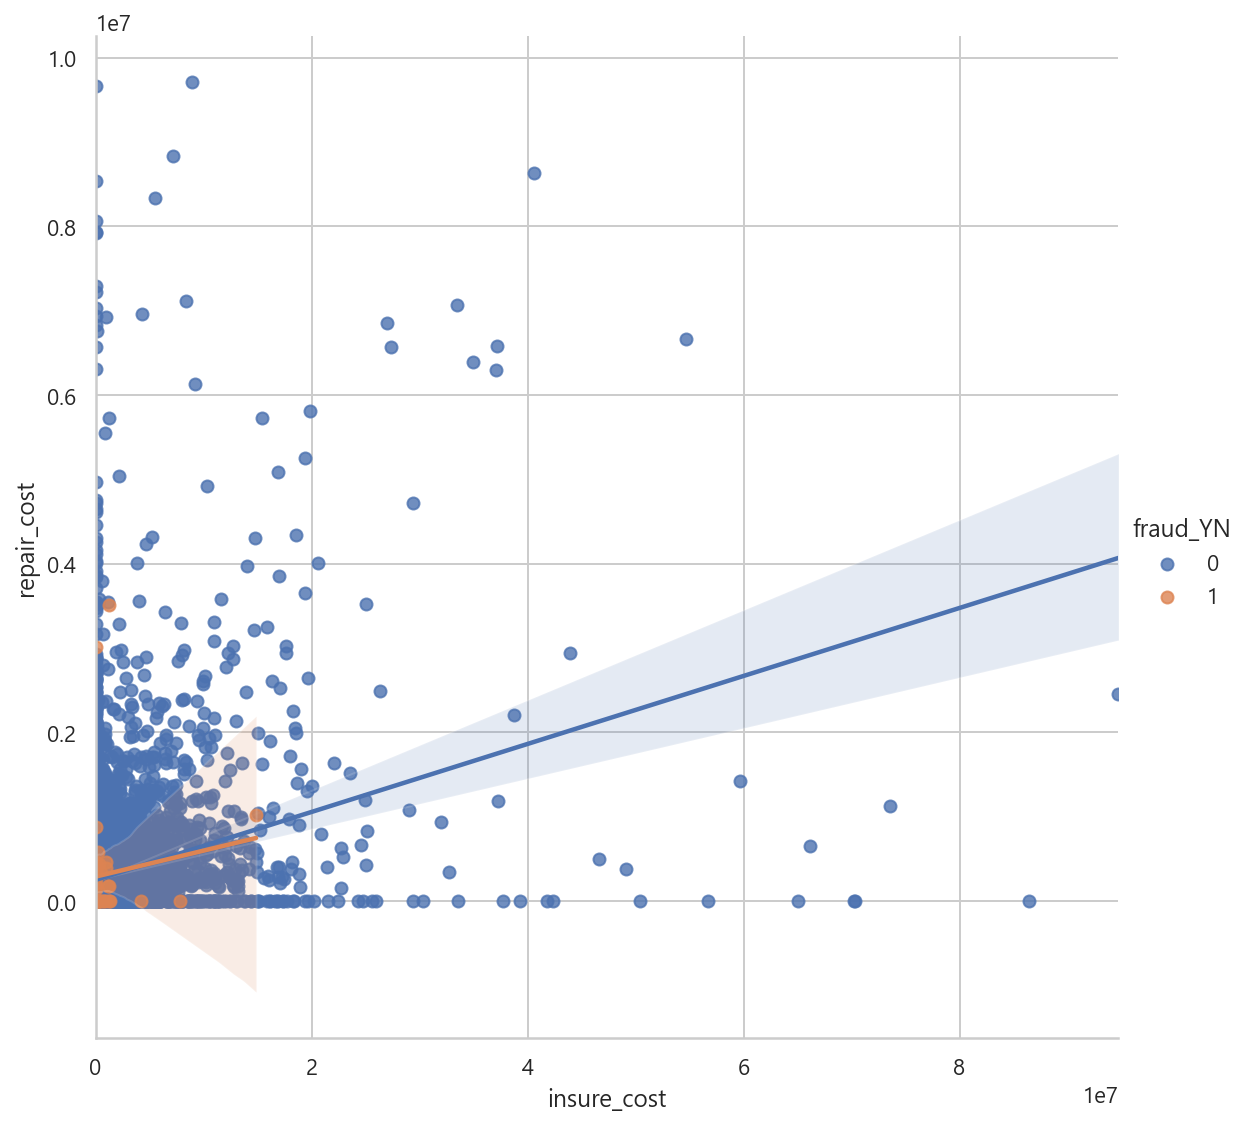

In [19]:
# Does insure cost and repair cnt affect repair cost?
sns.lmplot(data=socar, x='insure_cost', y='repair_cost', hue='fraud_YN', size=8);

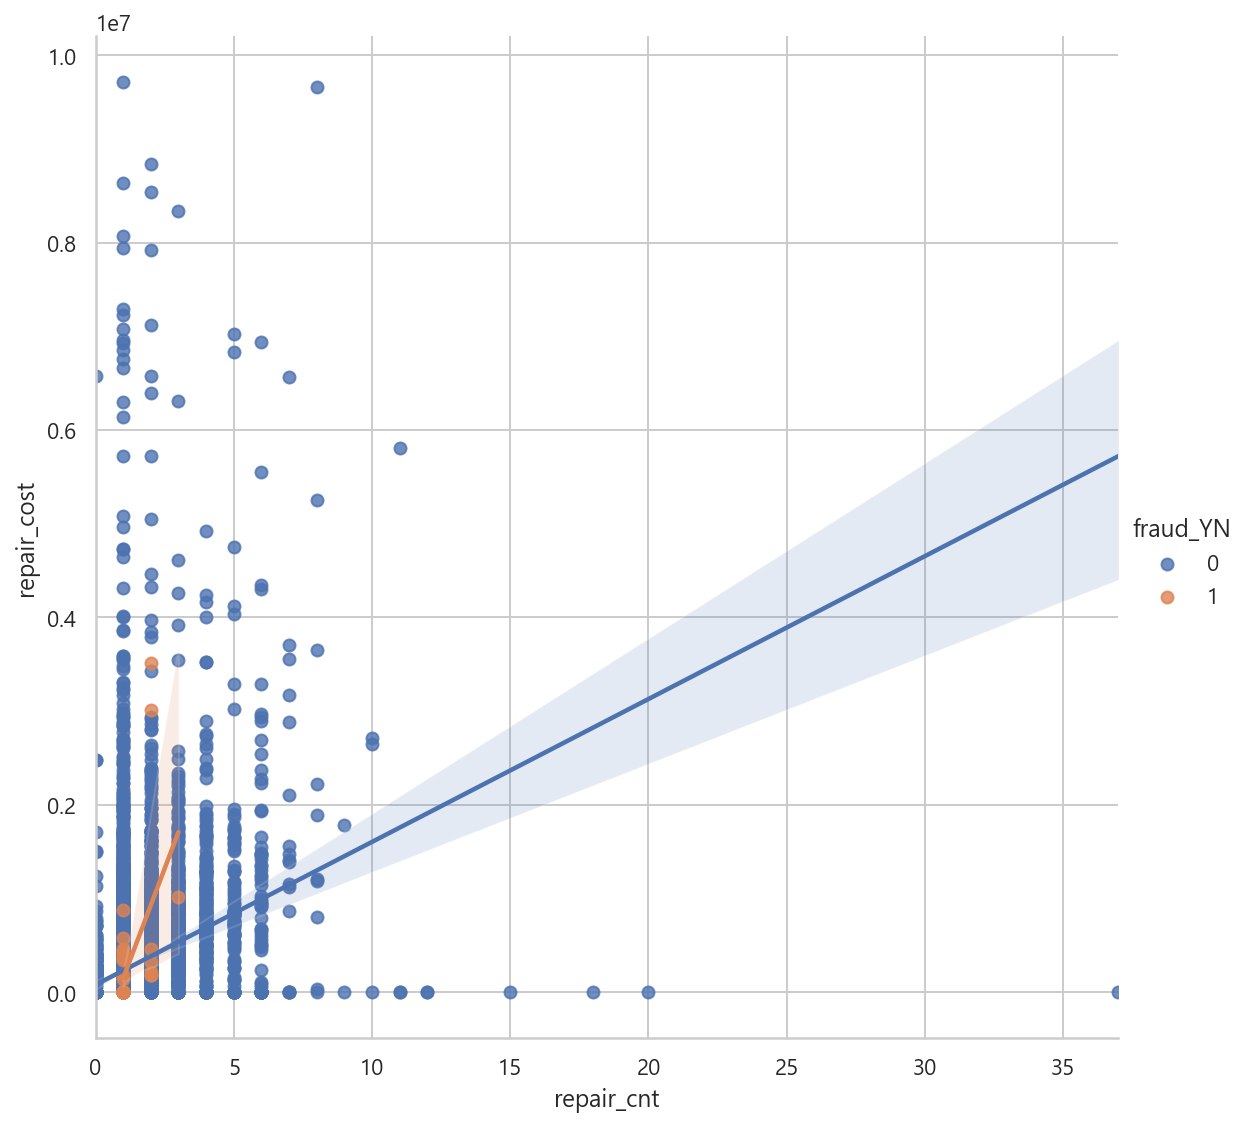

In [20]:
sns.lmplot(data=socar, x='repair_cnt', y='repair_cost', hue='fraud_YN', size=8);

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({"VIF Factor": [variance_inflation_factor(socar.values, idx) 
                             for idx in range(socar.shape[1])], "features": socar.columns})

,VIF Factor,features
0,1.004691,fraud_YN
1,5.635391,car_model
2,1.245376,sharing_type
3,5.668244,age_group
4,1.189571,has_previous_accident
5,6.635296,cumulative_use_count
6,1.015653,b2b
7,7.958630,accident_ratio
8,6.406787,pf_type
9,1.380620,socarpass


# Preprocessing

In [22]:
socar_pp = socar_tr.copy()

repair_cost_mean = socar[(socar['repair_cost'] < 3000000) & (socar['repair_cost'] > 100000)]['repair_cost'].mean()
insure_cost_mean = socar[(socar['insure_cost'] < 3000000) & (socar['insure_cost'] > 100000)]['insure_cost'].mean()

socar_pp['repair_cost'][(socar['repair_cost'] >= 3000000)] = repair_cost_mean
socar_pp['repair_cost'][(socar['repair_cost'] <= 100000)] = repair_cost_mean

socar_pp['insure_cost'][(socar['insure_cost'] >= 3000000)] = insure_cost_mean
socar_pp['insure_cost'][(socar['insure_cost'] <= 100000)] = insure_cost_mean

# Scaling
- OneHotEncoder & MinMaxScaler

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

def encoding(data, scaler):
    cat_attribs = ['car_model', 'age_group', 'cumulative_use_count', 'b2b', 'pf_type', 
                   'start_hour', 'duration', 'accident_hour', 'accident_location', 'repair_cnt',
                   'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt']

    num_attribs = ['accident_ratio', 'repair_cost', 'insure_cost']

    etc_attribs = ['sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2']

    full_pipeline = ColumnTransformer([('scaler', scaler, num_attribs),
                  ('cat', OneHotEncoder(), cat_attribs),
                  ('imputer', SimpleImputer(strategy='constant'), etc_attribs)])
    data = full_pipeline.fit_transform(data)
    
    return data

# Split dataset

In [24]:
from sklearn.model_selection import train_test_split

socar_1 = socar_pp.copy()

X = socar_1.drop('fraud_YN', axis=1)
y = socar_1['fraud_YN']

X_ss = encoding(X, MinMaxScaler())

X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=13, stratify=y)

In [25]:
X_train.shape, X_test.shape

((10303, 85), (2576, 85))

In [26]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([10276,    27], dtype=int64))

In [27]:
tmp_tr = np.unique(y_train, return_counts=True)[1]
tmp_test = np.unique(y_test, return_counts=True)[1]

print("ratio of y_train per x_train :", tmp_tr[1]/len(y_train) * 100)
print("ratio of y_test per x_test :", tmp_test[1]/len(y_test) * 100)

ratio of y_train per x_train : 0.2620595942929244
ratio of y_test per x_test : 0.2717391304347826


# Evaluation

In [28]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc


In [29]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('===========')
    
    print('Accuracy : {0:.4f}, Precision:{1:.4f}'.format(acc, pre))
    print('Recall : {0:.4f}, F1:{1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))
    

In [30]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(random_state=10)
lg_clf.fit(X_train, y_train)
lg_pred = lg_clf.predict(X_test)

print_clf_eval(y_test, lg_pred)

=> confusion matrix
[[2569    0]
 [   7    0]]
Accuracy : 0.9973, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=10, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[2568    1]
 [   7    0]]
Accuracy : 0.9969, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.4998


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[2569    0]
 [   7    0]]
Accuracy : 0.9973, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [33]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> confusion matrix
[[2569    0]
 [   7    0]]
Accuracy : 0.9973, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


# Over Sampling

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [35]:
X_train.shape, y_train.shape, X_train_over.shape, y_train_over.shape

((10303, 85), (10303,), (20552, 85), (20552,))

In [36]:
np.unique(y_train, return_counts=True), np.unique(y_train_over, return_counts=True)

((array([0, 1], dtype=int64), array([10276,    27], dtype=int64)),
 (array([0, 1], dtype=int64), array([10276, 10276], dtype=int64)))

In [37]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []
    
    for model in models:

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        tmp.append(get_clf_eval(y_test, pred))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)


In [38]:
models = [dt_clf, rf_clf, lgbm_clf]
model_names = ['DecisionTree', 'RandomForest','LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  2.6888444423675537


,accuracy,precision,recall,f1,roc_auc
DecisionTree,0.803960,0.002,0.142857,0.003945,0.474309
RandomForest,0.997283,0.000,0.000000,0.000000,0.500000
LightGBM,0.997283,0.000,0.000000,0.000000,0.500000


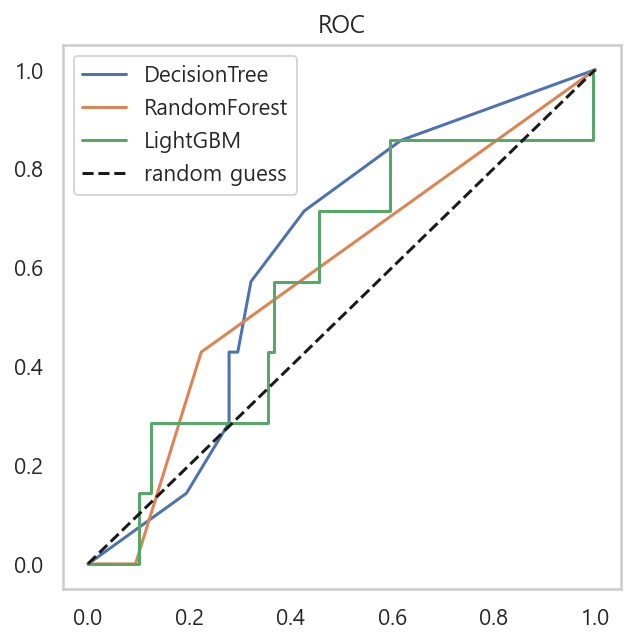

In [39]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_valid, y_valid):
    plt.figure(figsize=(5, 5))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_valid)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_valid, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        
    plt.plot([0, 1], [0, 1], "k--", label="random guess")
    plt.title("ROC")
    plt.legend()
    plt.grid()
    plt.show()
    
draw_roc_curve(models, model_names, X_test, y_test)

# Function

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


def get_pca_data(data, random_state, n_components=2):
    pca = PCA(n_components=n_components, random_state=random_state)
    pca.fit(data)
    
    return pca.transform(data), pca

def get_result_pd(models, model_names, X_train, y_train, X_train_over, y_train_over, X_test, y_test, test_data_X, test_data_y):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []
    
    for model, param in models:
        # Modeling
        grid = GridSearchCV(model, param, cv=5, scoring = 'recall')
        grid.fit(X_train, y_train)
        
        best_model = grid.best_estimator_
        best_model.fit(X_train_over, y_train_over)
        
        pred = best_model.predict(X_test)
        tmp.append(get_clf_eval(y_test, pred))
        # predict test dataset
        pred_test = best_model.predict(test_data_X)
        tmp.append(get_clf_eval(test_data_y, pred_test))
        
    df = pd.DataFrame(tmp, columns=col_names, index=model_names)
    df = df.style.applymap(color)
        
    return df

def color(val):
    color = 'orange' if val > 0.6 else 'black'
    return 'color: %s' % color

def get_outlier(df=None, column=None, weight=1.5):
    fraud= df[df["fraud_YN"]==0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_25 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 = quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler)
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC


def model_scores(train_data, test_data, scaler, drop_cols=[], sampling=SMOTE, random_state=13, onehotencoding=False, n_components=0, num_attribs = ['accident_ratio', 'repair_cost', 'insure_cost']):
    
    # drop columns
    if drop_cols:
        train_data = train_data.drop(drop_cols, axis=1) 
        test_data = test_data.drop(drop_cols, axis=1)
        
    # split dataset        
    X = train_data.drop('fraud_YN', axis=1)
    y = train_data.fraud_YN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    
    X_eval = test_data.drop('fraud_YN', axis=1)
    y_eval = test_data.fraud_YN    
    
    # scaling
    if num_attribs:
        num_attribs = [attrib for attrib in num_attribs if attrib not in drop_cols]

        scaler_obj = scaler
        scaler_obj.fit(X_train[num_attribs])

        X_train[num_attribs] = scaler_obj.transform(X_train[num_attribs])
        X_test[num_attribs] = scaler_obj.transform(X_test[num_attribs])
        X_eval[num_attribs] = scaler_obj.transform(X_eval[num_attribs])
    
    # onehotencoding
    if onehotencoding:
        cat_attribs = [attrib for attrib in X_train.columns if attrib not in drop_cols + ['accident_ratio', 'repair_cost', 'insure_cost']]
                
        X_train = pd.get_dummies(X_train, columns=cat_attribs)
        X_test = pd.get_dummies(X_test, columns=cat_attribs)
        X_eval = pd.get_dummies(X_eval, columns=cat_attribs)  
    
    # PCA
    if n_components:
        X_train, pca1 = get_pca_data(X_train, n_components=n_components, random_state=random_state)
        X_test, pca1 = get_pca_data(X_test, n_components=n_components, random_state=random_state)
        X_eval, pca1 = get_pca_data(X_eval, n_components=n_components, random_state=random_state)
        
    # sampling
    spl = sampling(random_state=random_state)
    X_train_over, y_train_over = spl.fit_sample(X_train, y_train)  
        
    # classifier
    lg_clf = LogisticRegression(random_state=random_state)
    dt_clf = DecisionTreeClassifier(random_state=random_state, max_depth=2)
    rf_clf = RandomForestClassifier(random_state=random_state, n_jobs=-1, n_estimators=100)
    lgbm_clf = LGBMClassifier(random_state=random_state, n_estimators=200, num_leaves=16, n_jobs=-1, boost_from_average=False)
    svm_clf = LinearSVC(random_state=random_state)
    
    # hyper-parameters
    lg_params=[{'C':[0.1, 0.5, 1]}]
    dt_params= [{'max_depth': [2, 4, 8, 16]}]
    rf_params = [{'n_estimators': [50, 100, 200, 400]}]
    lgbm_params = [{'n_estimators': [50, 100, 200, 400], 'num_leaves': [4, 8, 16, 32]}]
    svm_params = [{'C':[0.1, 0.5, 1]}]
    
    models = [(lg_clf,lg_params), (dt_clf,dt_params), (rf_clf,rf_params), (lgbm_clf,lgbm_params), (svm_clf,svm_params)]
    model_names = ['LogisticRegression','LogisticRegression(test)','DecisionTree','DecisionTree(test)',
                   'RandomForest','RandomForest(test)','LightGBM','LightGBM(test)', 'SVM', 'SVM(test)']
    
    start_time = time.time()
    results = get_result_pd(models, model_names, X_train, y_train, X_train_over, y_train_over, X_test, y_test, X_eval, y_eval)
    
    return results

model_scores(socar_tr, socar_test, StandardScaler(), n_components=2, sampling=SMOTE)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.588509,0.000948,0.142857,0.001883,0.366290
LogisticRegression(test),0.571932,0.002247,0.428571,0.004471,0.500413
DecisionTree,0.766304,0.000000,0.000000,0.000000,0.384196
DecisionTree(test),0.823134,0.001828,0.142857,0.003610,0.483760
RandomForest,0.812888,0.004175,0.285714,0.008230,0.550019
RandomForest(test),0.827940,0.000000,0.000000,0.000000,0.414900
LightGBM,0.698370,0.000000,0.000000,0.000000,0.350136
LightGBM(test),0.741109,0.002484,0.285714,0.004926,0.513923
SVM,0.587733,0.000946,0.142857,0.001880,0.365901
SVM(test),0.571932,0.002247,0.428571,0.004471,0.500413


# 1st Trial
- MinMaxScaler & OneHotEncoding
- PCA
- RandomOverSampler

In [233]:
model_scores(socar_1hot_tr, socar_1hot_test, MinMaxScaler(), n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.666537,0.004651,0.571429,0.009227,0.619112
LogisticRegression(test),0.579622,0.002288,0.428571,0.004552,0.504266
DecisionTree,0.960404,0.000000,0.000000,0.000000,0.481510
DecisionTree(test),0.997757,0.000000,0.000000,0.000000,0.500000
RandomForest,0.997283,0.000000,0.000000,0.000000,0.500000
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.707298,0.005298,0.571429,0.010499,0.639548
LightGBM(test),0.951938,0.000000,0.000000,0.000000,0.477039
SVM,0.678960,0.004831,0.571429,0.009581,0.625341
SVM(test),0.579942,0.002290,0.428571,0.004556,0.504427


# 2nd Trial
- StandardScaler & OneHotEncoding
- PCA
- RandomOverSampler

In [234]:
model_scores(socar_1hot_tr, socar_1hot_test, StandardScaler(), n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.741460,0.003017,0.285714,0.005970,0.514208
LogisticRegression(test),0.657161,0.000939,0.142857,0.001866,0.400587
DecisionTree,0.480202,0.002242,0.428571,0.004461,0.454457
DecisionTree(test),0.605255,0.001627,0.285714,0.003236,0.445844
RandomForest,0.996506,0.000000,0.000000,0.000000,0.499611
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.764363,0.001661,0.142857,0.003284,0.454457
LightGBM(test),0.954822,0.000000,0.000000,0.000000,0.478484
SVM,0.742624,0.004532,0.428571,0.008969,0.586026
SVM(test),0.648831,0.000917,0.142857,0.001821,0.396413


# 3rd Trial
- RobustScaler & OneHotEncoding
- PCA
- RandomOverSampler

In [235]:
model_scores(socar_1hot_tr, socar_1hot_test, RobustScaler(), n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.743012,0.001522,0.142857,0.003012,0.443752
LogisticRegression(test),0.139699,0.002230,0.857143,0.004449,0.497614
DecisionTree,0.997283,0.000000,0.000000,0.000000,0.500000
DecisionTree(test),0.997437,0.000000,0.000000,0.000000,0.499839
RandomForest,0.997283,0.000000,0.000000,0.000000,0.500000
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.995342,0.000000,0.000000,0.000000,0.499027
LightGBM(test),0.917655,0.000000,0.000000,0.000000,0.459859
SVM,0.139363,0.002700,0.857143,0.005384,0.497275
SVM(test),0.139699,0.002230,0.857143,0.004449,0.497614


# 4th Trial
- Preprocessing null to median
- StandardScaler & OneHotEncoding
- PCA
- RandomOverSampler or SMOTE

In [236]:
socar_4 = socar.copy()

In [237]:
repair_cost_median = socar_4[(socar_4['repair_cost'] != 0)]['repair_cost'].median()
socar_4['repair_cost'][(socar_4['repair_cost'] == 0)] = repair_cost_median

insure_cost_median = socar_4[(socar_4['insure_cost'] != 0)]['insure_cost'].median()
socar_4['insure_cost'][(socar_4['insure_cost'] == 0)] = insure_cost_median

In [238]:
cat_attribs = [attrib for attrib in socar_4.columns if attrib not in ['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'test_set']]
                
socar_1hot = pd.get_dummies(socar_4, columns=cat_attribs)

socar_1hot_tr_4 = socar_1hot[socar_1hot.test_set == 0].drop(['test_set'], axis=1)
socar_1hot_test_4 = socar_1hot[socar_1hot.test_set == 1].drop(['test_set'], axis=1)

In [239]:
model_scores(socar_1hot_tr_4, socar_1hot_test_4, StandardScaler(), n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.811335,0.000000,0.000000,0.000000,0.406773
LogisticRegression(test),0.636014,0.001765,0.285714,0.003509,0.461258
DecisionTree,0.530668,0.002483,0.428571,0.004938,0.479759
DecisionTree(test),0.634732,0.001759,0.285714,0.003497,0.460616
RandomForest,0.997283,0.000000,0.000000,0.000000,0.500000
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.844720,0.005038,0.285714,0.009901,0.565979
LightGBM(test),0.919577,0.004065,0.142857,0.007905,0.532090
SVM,0.824146,0.000000,0.000000,0.000000,0.413196
SVM(test),0.586991,0.001555,0.285714,0.003094,0.436691


In [240]:
model_scores(socar_1hot_tr_4, socar_1hot_test_4, StandardScaler(), n_components=2, sampling=SMOTE)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.791149,0.001876,0.142857,0.003704,0.467886
LogisticRegression(test),0.549183,0.002134,0.428571,0.004246,0.489013
DecisionTree,0.530668,0.002483,0.428571,0.004938,0.479759
DecisionTree(test),0.634732,0.001759,0.285714,0.003497,0.460616
RandomForest,0.926242,0.000000,0.000000,0.000000,0.464383
RandomForest(test),0.963153,0.000000,0.000000,0.000000,0.482659
LightGBM,0.810559,0.004124,0.285714,0.008130,0.548852
LightGBM(test),0.844921,0.002088,0.142857,0.004115,0.494678
SVM,0.775233,0.001742,0.142857,0.003442,0.459907
SVM(test),0.534444,0.002066,0.428571,0.004112,0.481627


# 5th Trial
- Drop insure_cost & repair_cost
- StandardScaler & OneHotEncoding
- PCA
- RandomUnderSampler

In [241]:
socar_5 = socar.copy()

In [242]:
socar_5.drop(['repair_cost','insure_cost'], axis=1, inplace=True)

In [243]:
cat_attribs = [attrib for attrib in socar_5.columns if attrib not in ['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'test_set']]
                
socar_1hot = pd.get_dummies(socar_5, columns=cat_attribs)

socar_1hot_tr_5 = socar_1hot[socar_1hot.test_set == 0].drop(['test_set'], axis=1)
socar_1hot_test_5 = socar_1hot[socar_1hot.test_set == 1].drop(['test_set'], axis=1)

In [244]:
model_scores(socar_1hot_tr_5, socar_1hot_test_5, StandardScaler(), n_components=2, sampling=RandomUnderSampler, num_attribs=['accident_ratio'])

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.758152,0.006410,0.571429,0.012678,0.665045
LogisticRegression(test),0.551105,0.002143,0.428571,0.004264,0.489976
DecisionTree,0.401786,0.003881,0.857143,0.007727,0.628844
DecisionTree(test),0.516501,0.001989,0.428571,0.003960,0.472635
RandomForest,0.509705,0.003949,0.714286,0.007855,0.611717
RandomForest(test),0.138417,0.002227,0.857143,0.004443,0.496972
LightGBM,0.519022,0.004823,0.857143,0.009592,0.687622
LightGBM(test),0.516501,0.001989,0.428571,0.003960,0.472635
SVM,0.809783,0.006135,0.428571,0.012097,0.619696
SVM(test),0.636335,0.001767,0.285714,0.003512,0.461418


# 6th Trial
- Drop police_site_aid_YN & acc_type1
- StandardScaler & OneHotEncoding
- PCA
- RandomUnderSampler

In [245]:
socar_6 = socar.copy()

In [246]:
socar_6.drop(['police_site_aid_YN', 'acc_type1'], axis=1, inplace=True)

In [247]:
cat_attribs = [attrib for attrib in socar_6.columns if attrib not in ['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'test_set']]
                
socar_1hot = pd.get_dummies(socar_6, columns=cat_attribs)

socar_1hot_tr_6 = socar_1hot[socar_1hot.test_set == 0].drop(['test_set'], axis=1)
socar_1hot_test_6 = socar_1hot[socar_1hot.test_set == 1].drop(['test_set'], axis=1)

In [248]:
model_scores(socar_1hot_tr_6, socar_1hot_test_6, StandardScaler(), n_components=2, sampling=RandomUnderSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.554348,0.003481,0.571429,0.006920,0.562865
LogisticRegression(test),0.483178,0.001861,0.428571,0.003706,0.455936
DecisionTree,0.621894,0.004103,0.571429,0.008147,0.596730
DecisionTree(test),0.699776,0.001073,0.142857,0.002130,0.421942
RandomForest,0.453028,0.003541,0.714286,0.007047,0.583301
RandomForest(test),0.512336,0.001317,0.285714,0.002621,0.399280
LightGBM,0.562500,0.003546,0.571429,0.007048,0.566952
LightGBM(test),0.518424,0.001997,0.428571,0.003976,0.473598
SVM,0.619953,0.004082,0.571429,0.008105,0.595757
SVM(test),0.524191,0.002022,0.428571,0.004024,0.476489


# 7th Trial
- Drop police_site_aid_YN & acc_type1
- StandardScaler & OneHotEncoding
- PCA(n_components=4)
- SMOTETomek

In [249]:
model_scores(socar_1hot_tr_6, socar_1hot_test_6, StandardScaler(), n_components=4, sampling=SMOTETomek)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.656444,0.002268,0.285714,0.004499,0.471584
LogisticRegression(test),0.610061,0.001647,0.285714,0.003276,0.448252
DecisionTree,0.329581,0.003464,0.857143,0.006901,0.592643
DecisionTree(test),0.451137,0.001170,0.285714,0.002330,0.368612
RandomForest,0.986413,0.000000,0.000000,0.000000,0.494550
RandomForest(test),0.981737,0.000000,0.000000,0.000000,0.491972
LightGBM,0.782220,0.001799,0.142857,0.003552,0.463410
LightGBM(test),0.754245,0.002618,0.285714,0.005188,0.520506
SVM,0.658773,0.002283,0.285714,0.004530,0.472752
SVM(test),0.611983,0.001656,0.285714,0.003292,0.449216


# 8th Trial
- Random Under Sampling
- Drop 5 columns
- StandardScaler & OneHotEncoding
- PCA(n_components=2)
- SMOTEENN

In [250]:
socar_8 = socar.copy()

In [251]:
socar_8.drop(['repair_cost','insure_cost','insurance_site_aid_YN','police_site_aid_YN','total_prsn_cnt'], axis=1, inplace=True)

In [252]:
cat_attribs = [attrib for attrib in socar_8.columns if attrib not in ['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'test_set']]
                
socar_1hot = pd.get_dummies(socar_8, columns=cat_attribs)

socar_1hot_tr_8 = socar_1hot[socar_1hot.test_set == 0].drop(['test_set'], axis=1)
socar_1hot_test_8 = socar_1hot[socar_1hot.test_set == 1].drop(['test_set'], axis=1)

In [253]:
model_scores(socar_1hot_tr_8, socar_1hot_test_8, StandardScaler(), n_components=2, sampling=SMOTEENN, num_attribs=['accident_ratio'])

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.482143,0.002251,0.428571,0.004478,0.455430
LogisticRegression(test),0.447613,0.002895,0.714286,0.005767,0.580650
DecisionTree,0.176630,0.002354,0.714286,0.004693,0.444726
DecisionTree(test),0.262095,0.002600,0.857143,0.005184,0.558950
RandomForest,0.825699,0.002252,0.142857,0.004435,0.485208
RandomForest(test),0.922781,0.000000,0.000000,0.000000,0.462428
LightGBM,0.705745,0.001328,0.142857,0.002632,0.425068
LightGBM(test),0.781480,0.000000,0.000000,0.000000,0.391618
SVM,0.487578,0.002274,0.428571,0.004525,0.458155
SVM(test),0.448254,0.002899,0.714286,0.005774,0.580971


# 9th Trial
- Preprocessing categorical features
- Drop 5 columns
- StandardScaler & OneHotEncoding
- PCA(n_components=2)
- RandomUnderSampler

In [254]:
socar_9 = socar.copy()

In [255]:
socar_9.drop(['repair_cost','insure_cost','insurance_site_aid_YN','police_site_aid_YN','total_prsn_cnt'], axis=1, inplace=True)

In [256]:
socar_9['acc_type1'][socar_9['acc_type1'] <= 1] = 0
socar_9['acc_type1'][socar_9['acc_type1'] > 1] = 1

socar_9['b2b'][socar_9['b2b'] == 2] = 1

socar_9['accident_ratio'][socar_9['accident_ratio'] >= 50] = 1
socar_9['accident_ratio'][socar_9['accident_ratio'] < 50] = 0

socar_9['repair_cnt'][socar_9['repair_cnt'] <= 2] = 0
socar_9['repair_cnt'][socar_9['repair_cnt'] > 2] = 1

In [257]:
cat_attribs = [attrib for attrib in socar_9.columns if attrib not in ['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'test_set']]
                
socar_1hot = pd.get_dummies(socar_9, columns=cat_attribs)

socar_1hot_tr_9 = socar_1hot[socar_1hot.test_set == 0].drop(['test_set'], axis=1)
socar_1hot_test_9 = socar_1hot[socar_1hot.test_set == 1].drop(['test_set'], axis=1)

In [258]:
model_scores(socar_1hot_tr_9, socar_1hot_test_9, StandardScaler(), n_components=2, sampling=RandomUnderSampler, num_attribs=['accident_ratio'])

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.644410,0.002191,0.285714,0.004348,0.465551
LogisticRegression(test),0.586671,0.003098,0.571429,0.006163,0.579067
DecisionTree,0.398292,0.002579,0.571429,0.005135,0.484624
DecisionTree(test),0.391862,0.001055,0.285714,0.002103,0.338907
RandomForest,0.449922,0.001414,0.285714,0.002815,0.368042
RandomForest(test),0.491509,0.001263,0.285714,0.002514,0.388843
LightGBM,0.621118,0.004094,0.571429,0.008130,0.596341
LightGBM(test),0.605575,0.000816,0.142857,0.001622,0.374736
SVM,0.641304,0.002172,0.285714,0.004310,0.463994
SVM(test),0.574175,0.003008,0.571429,0.005984,0.572805
